
# <p style="padding:10px;background-color:#338565;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Total Population dataset 🤓
</p>

<img src="https://media4.giphy.com/media/UNVdEj8LK9iuY/giphy.webp?cid=790b7611823xsetsv96laoscgnw2meonfpm7oj5odsvbsgvi&ep=v1_gifs_search&rid=giphy.webp&ct=g" width="100%" height="100%">


# <p style="padding:5px;background-color:#338565;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 15px;overflow:hidden;font-weight:500"> Import the Necessary Libraries 📚</p>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")


# <p style="padding:5px;background-color:#338565;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 15px;overflow:hidden;font-weight:500"> Reading Data 📚</p>

In [36]:
data = pd.read_excel('/content/population_total.xlsx')
data.head().style.background_gradient(cmap='Greens')


# <p style="padding:5px;background-color:#338565;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 15px;overflow:hidden;font-weight:500"> EDA 👀</p>

- The years from 2025 to 2100 didn't come yet, So we should drop them.

In [37]:
data.columns[226:]

Index([2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
       2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060,
       2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072,
       2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084,
       2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096,
       2097, 2098, 2099, 2100],
      dtype='object')

In [38]:
data.drop(data.columns[226:], axis=1, inplace=True)

In [39]:
data.head().style.background_gradient(cmap='Greens')

In [40]:
data.shape

(197, 226)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 226 entries, country to 2024
dtypes: object(226)
memory usage: 348.0+ KB


In [42]:
data.isnull().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2020       0
2021       0
2022       0
2023       0
2024       0
Length: 226, dtype: int64

In [43]:
data.duplicated().sum()

0

In [44]:
data['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

## Initial Data Assessment 📋
- **Number of Samples**: `197`
- **Number of Columns**: `226`
- **Missing Values**: `There is no missing.`
- **Data Types**:
  - Object (Categorical): all columns, we need to convert them.

  - There are no duplicate rows in the DataFrame

In [45]:
data.columns[1:]

Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
       ...
       2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
      dtype='object', length=225)

- The data has different measures ,so let's make them same :>

In [46]:
mp = {'k':' * 10**3', 'M':' * 10**6' ,'B': ' * 10**9'}
for col in data.columns[1:]:
    data[col] = data[col].astype(str).replace(mp.keys(), mp.values(), regex=True).apply(lambda x: pd.eval(x) if '*' in x else float(x))

In [47]:
data.head().style.background_gradient(cmap='Greens')

In [48]:
data.describe().T.style.background_gradient(cmap='Greens')

- Now we have same measures ' - '

In [49]:
data.describe(include="object").T.style.background_gradient(cmap='Greens')

In [50]:
data.isnull().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2020       0
2021       0
2022       0
2023       0
2024       0
Length: 226, dtype: int64

In [51]:
data.head().style.background_gradient(cmap='Greens')

In [52]:
data.set_index('country', inplace=True)
data_transposed = data.T

In [53]:
data.head().style.background_gradient(cmap='Greens')

In [54]:
data_transposed.head().style.background_gradient(cmap='Greens')

---

 ### Country :

 - Does population differ over countries?
 - Which is the most country to have population over years?

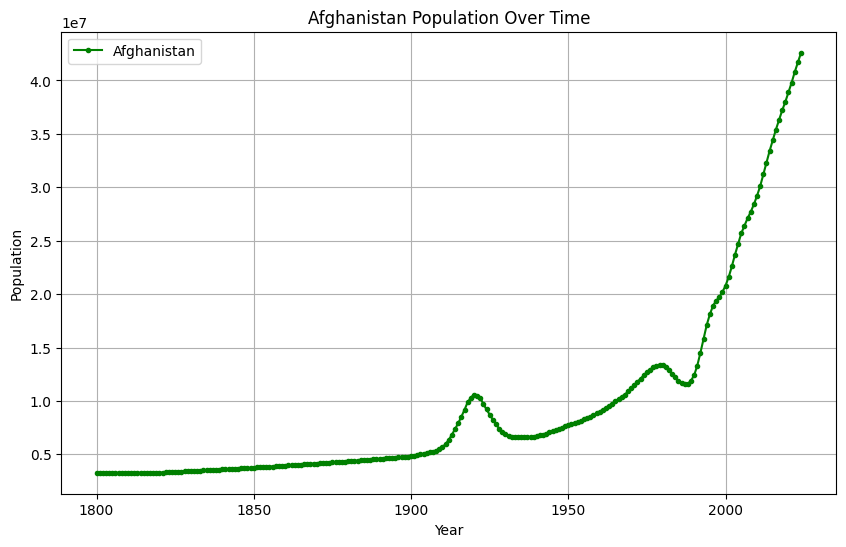

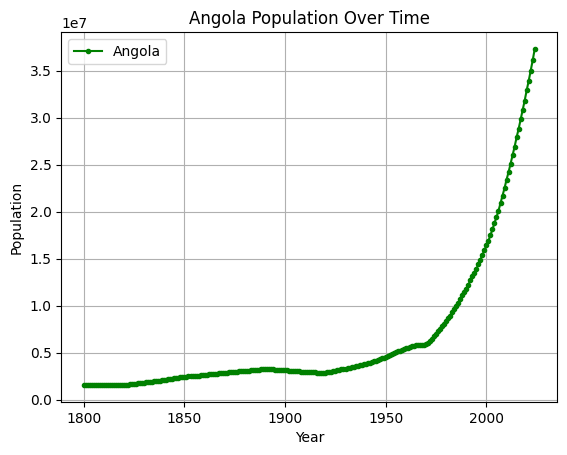

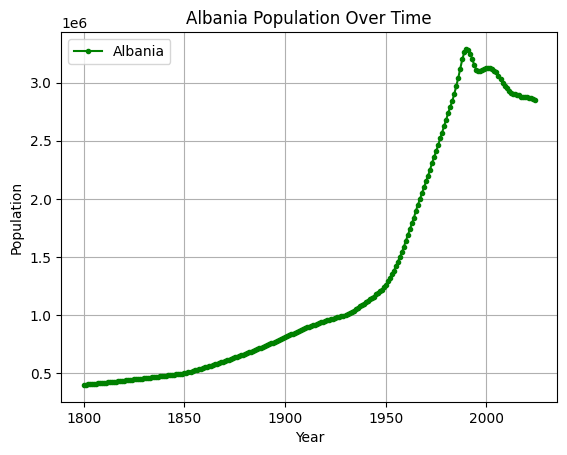

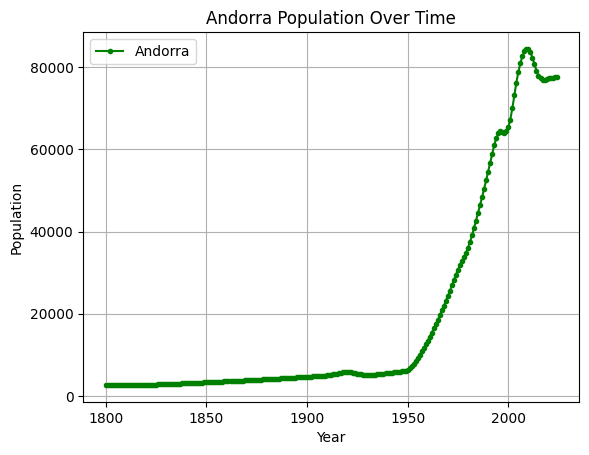

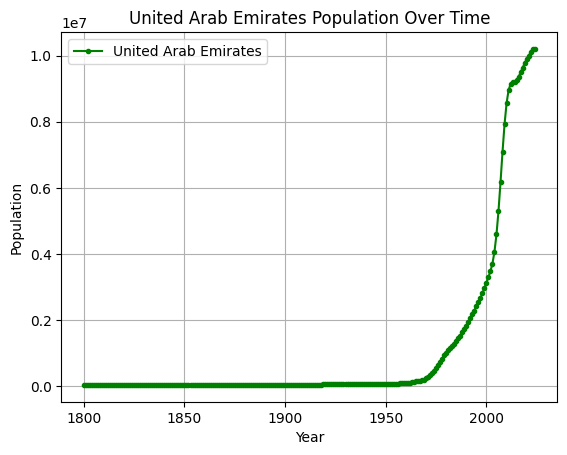

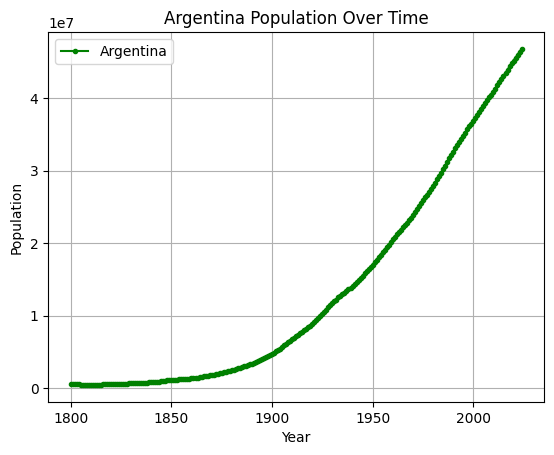

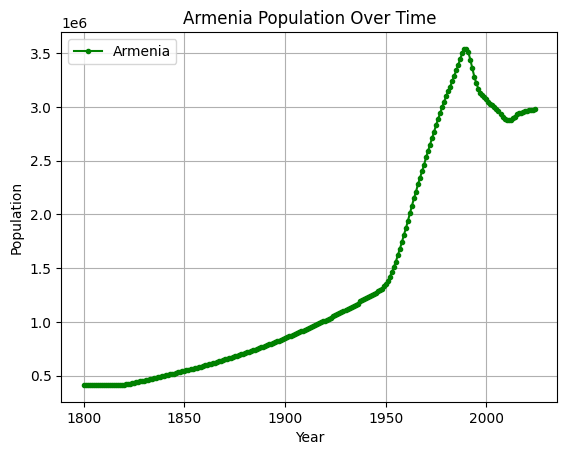

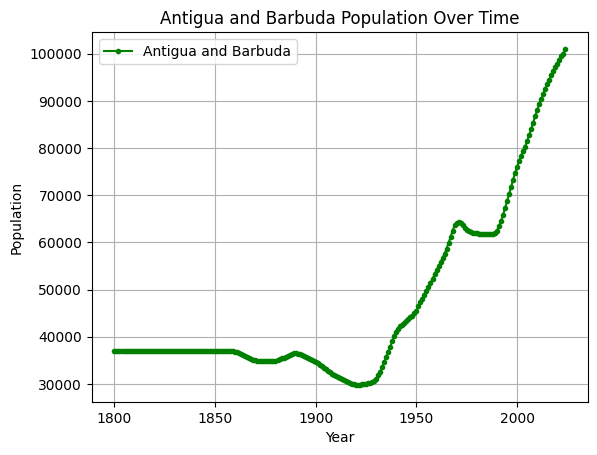

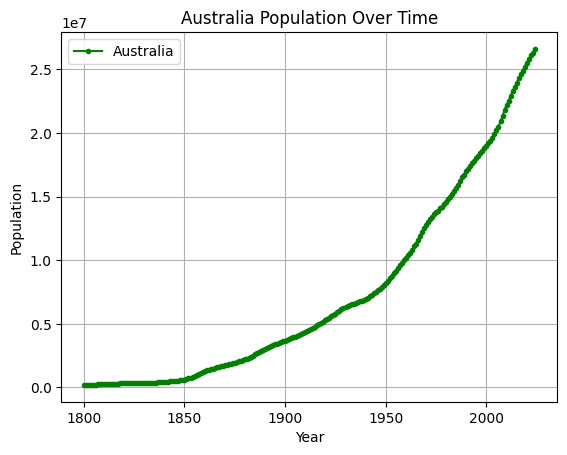

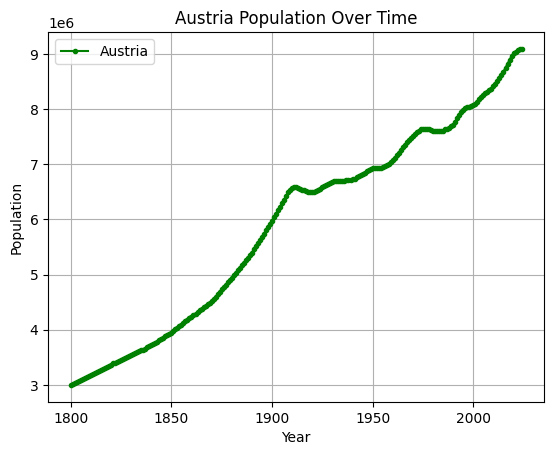

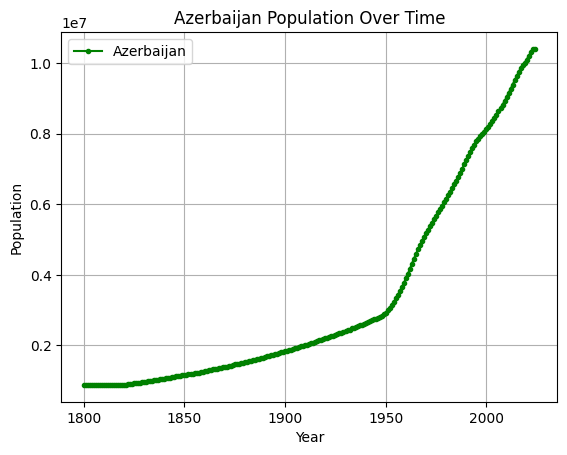

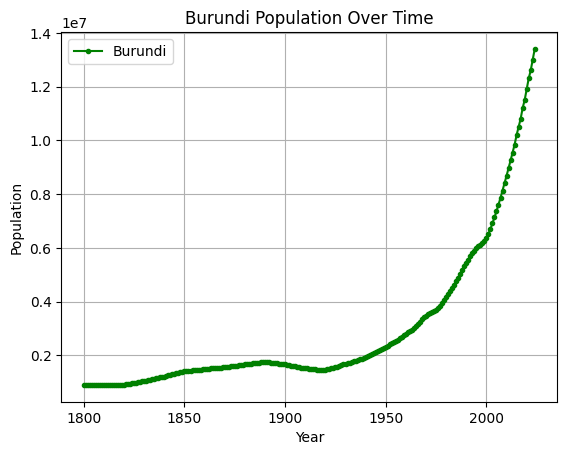

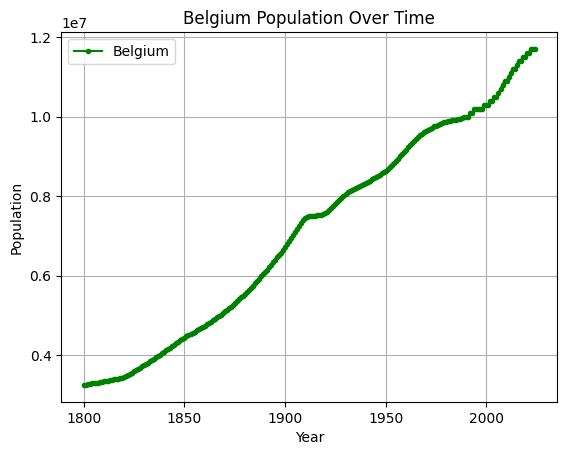

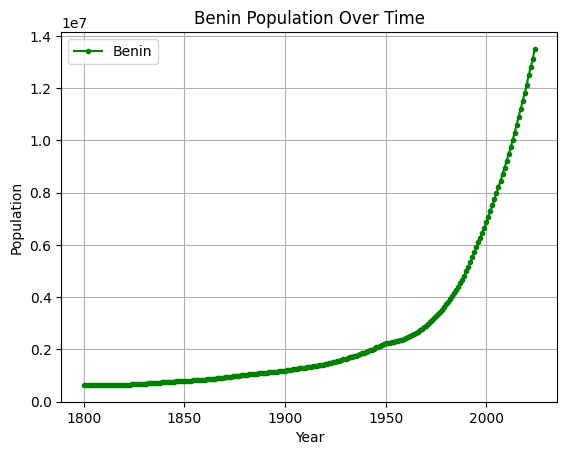

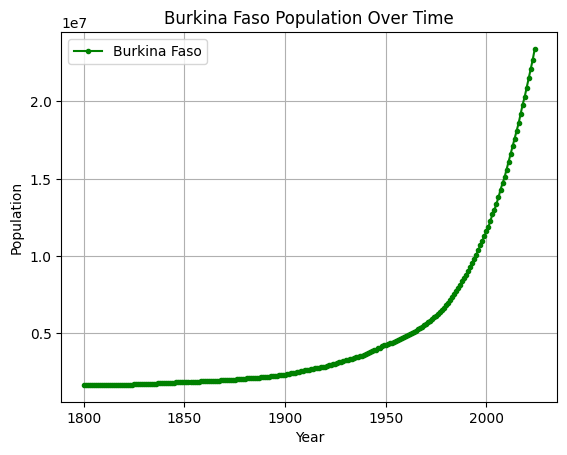

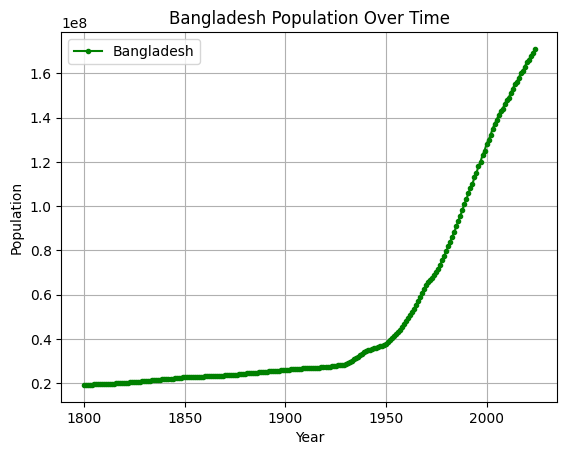

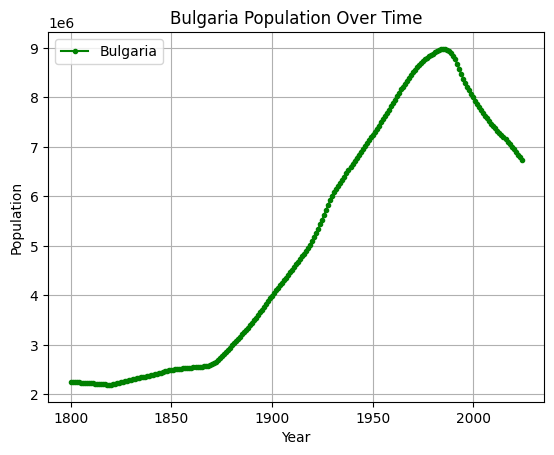

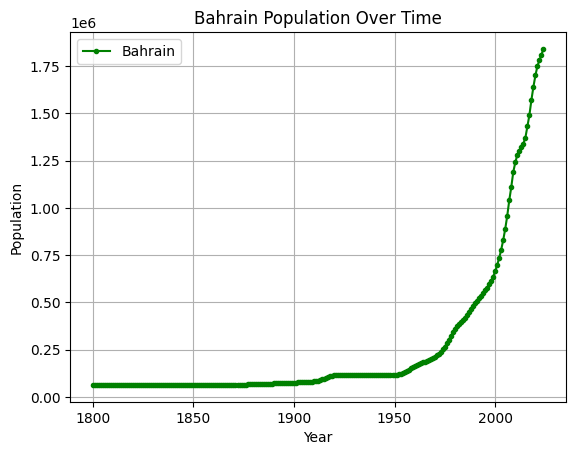

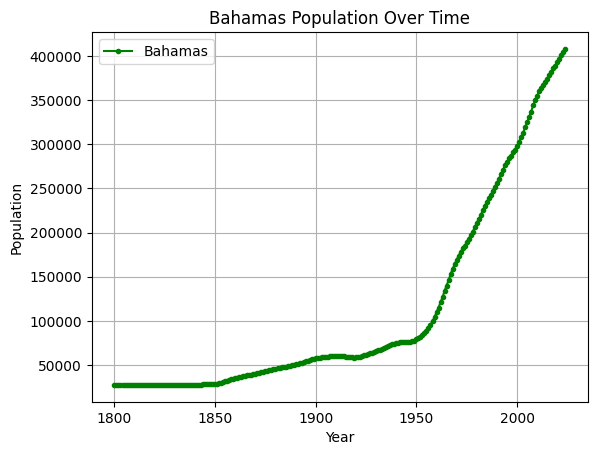

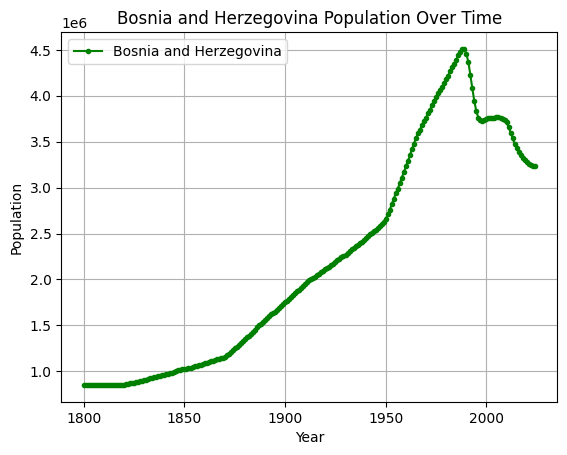

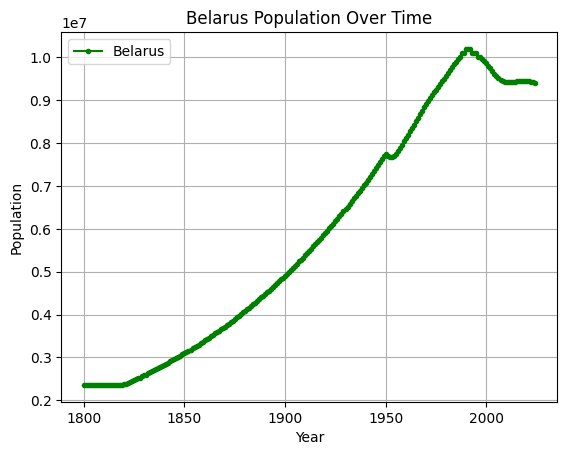

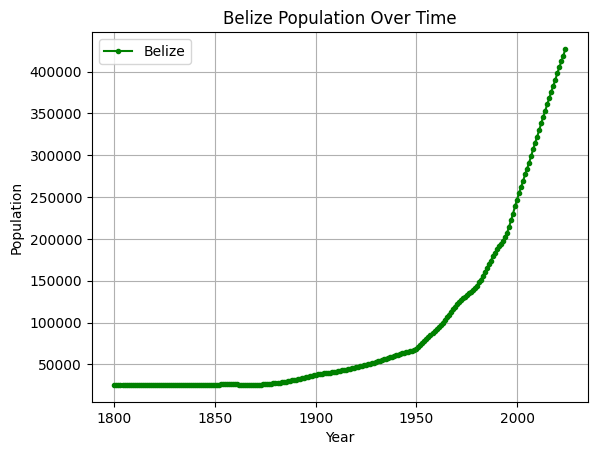

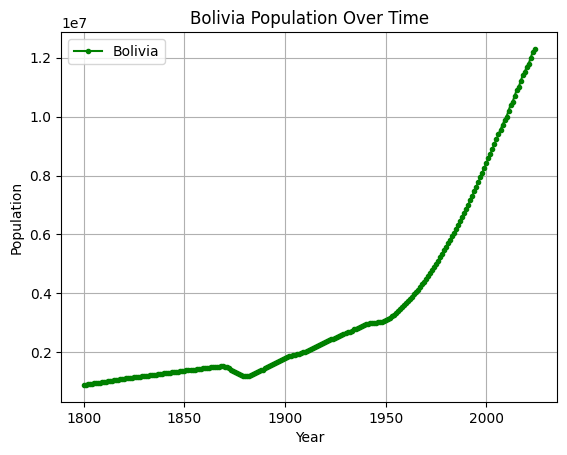

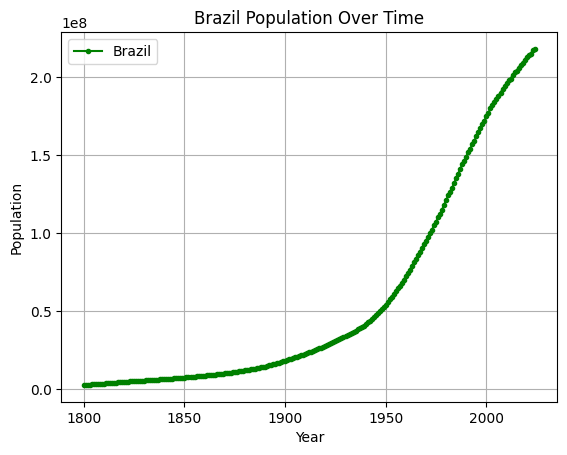

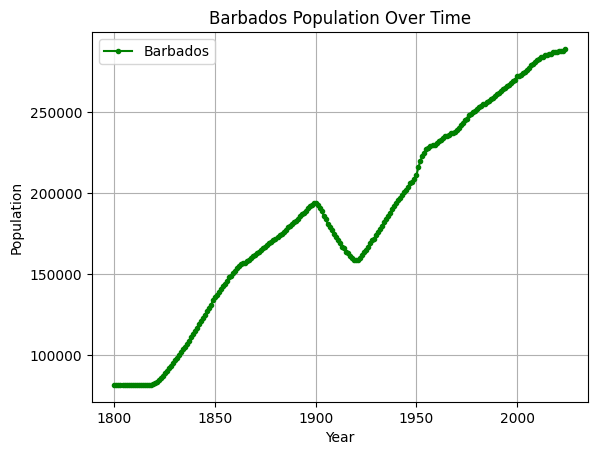

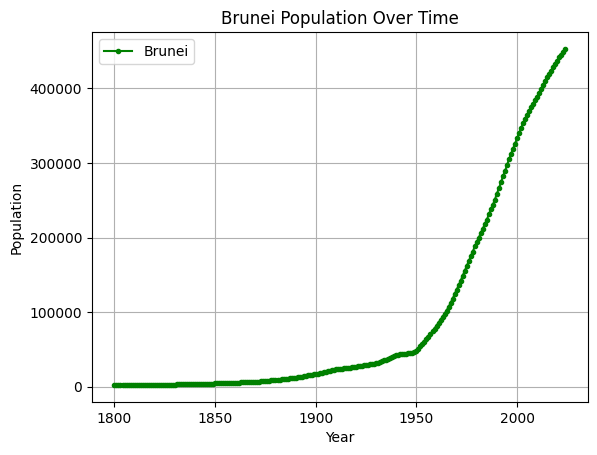

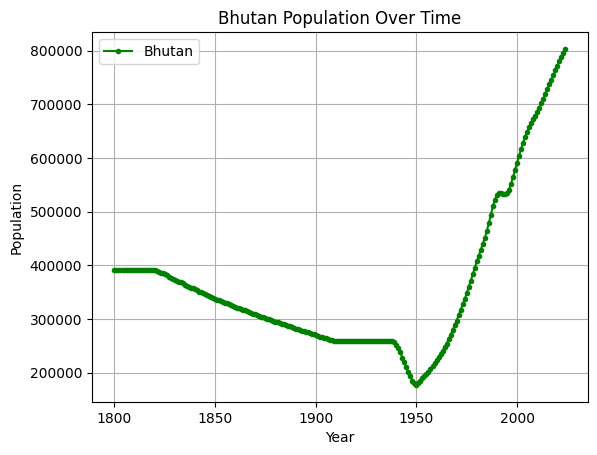

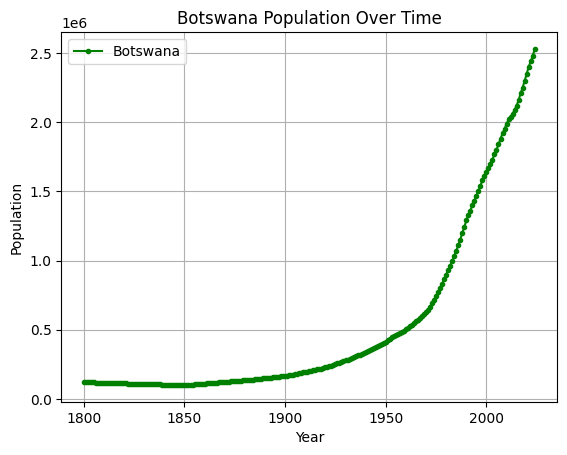

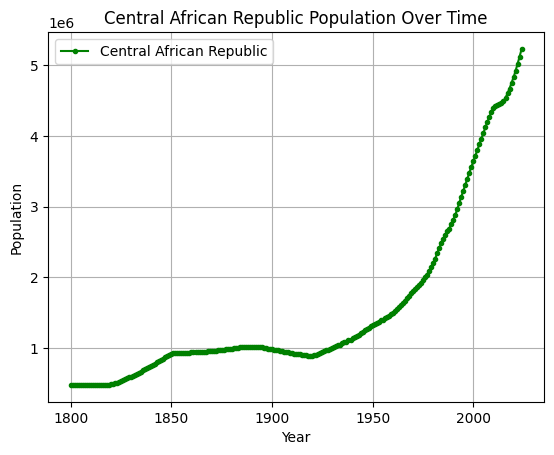

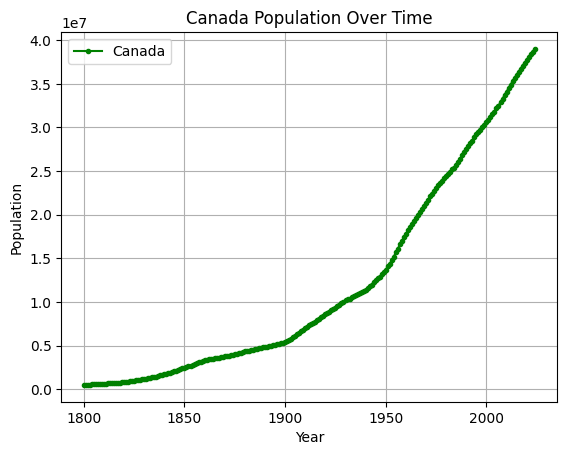

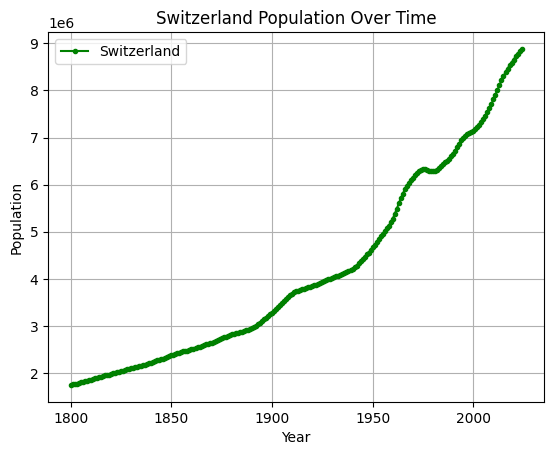

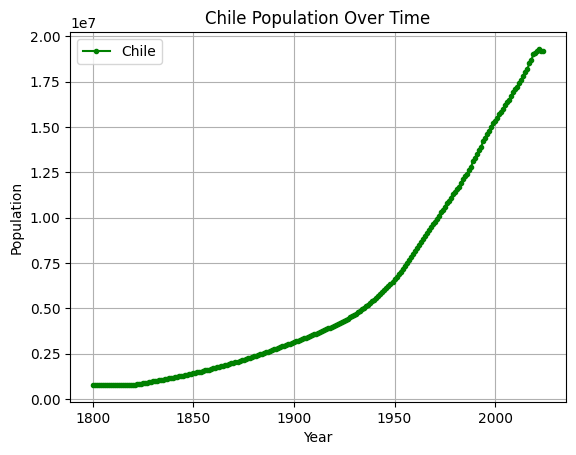

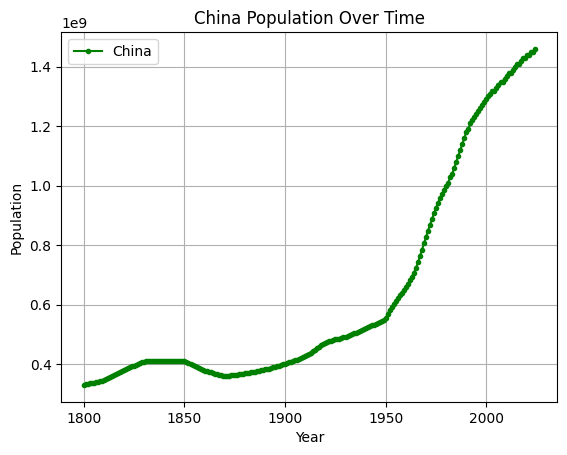

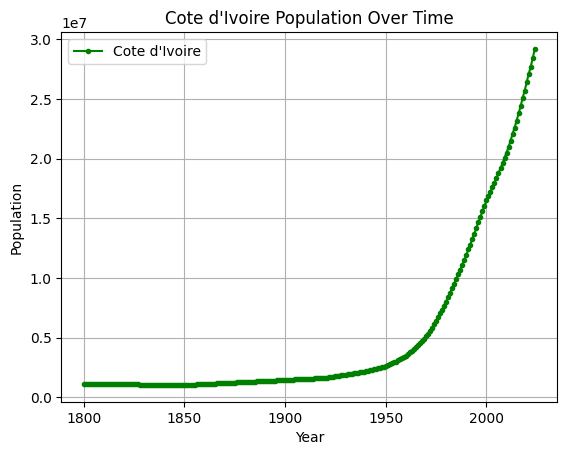

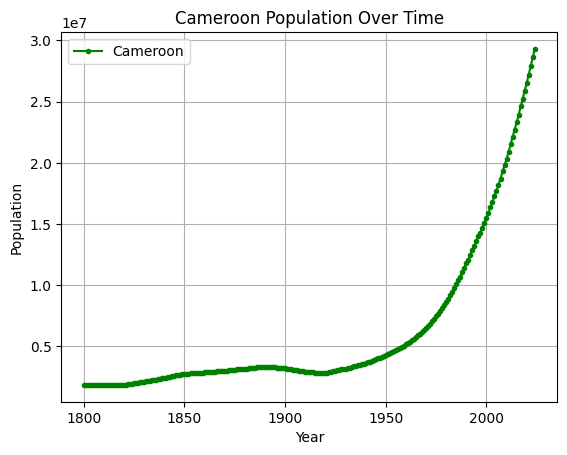

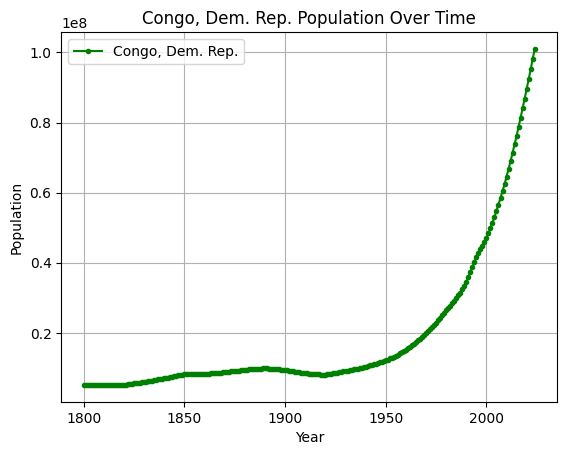

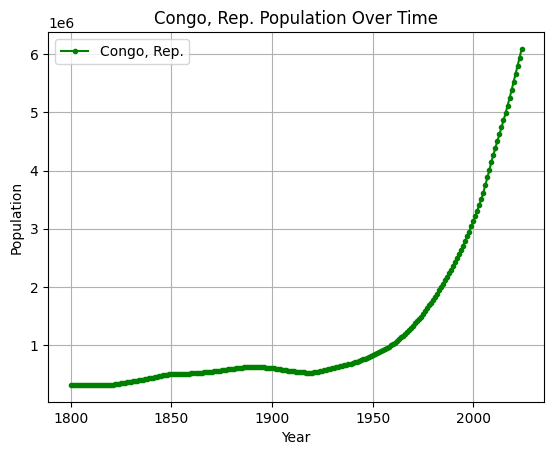

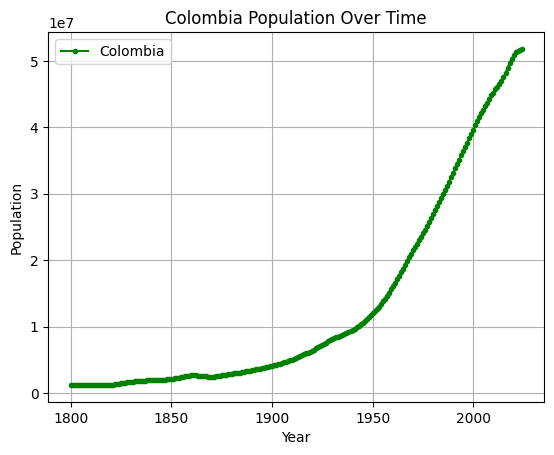

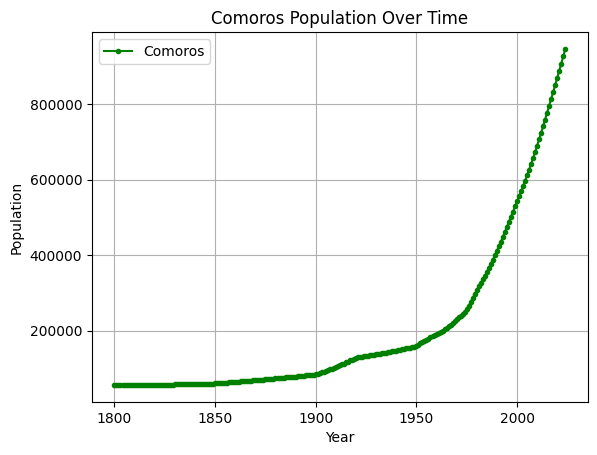

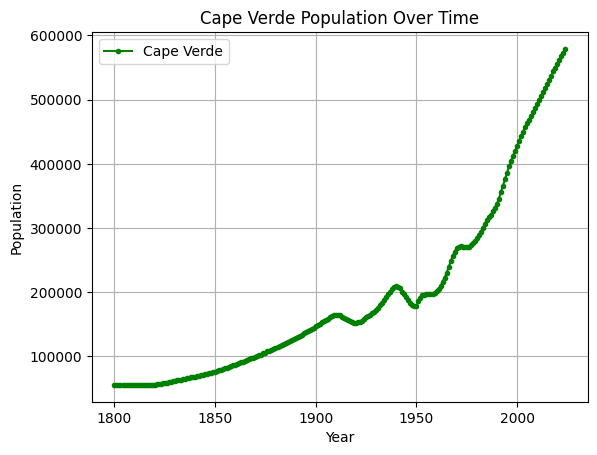

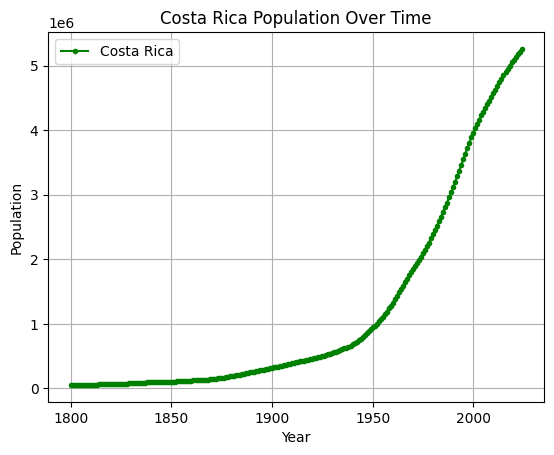

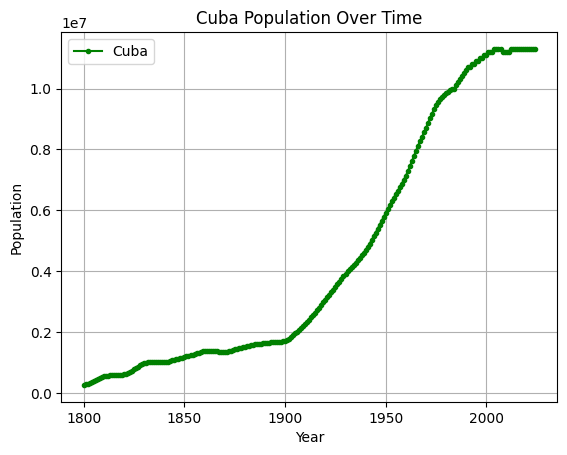

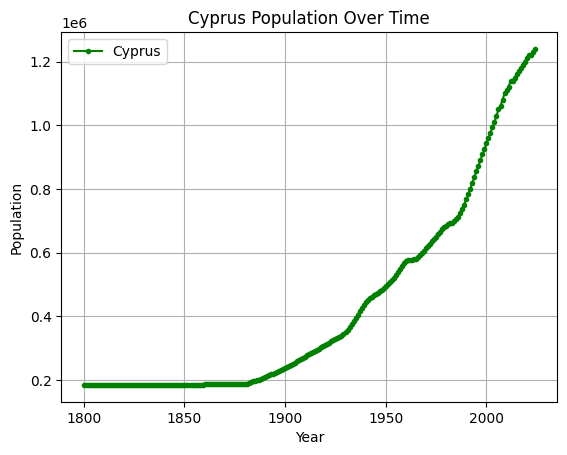

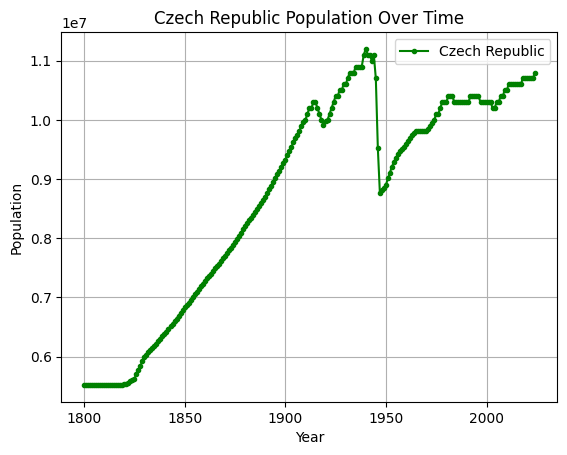

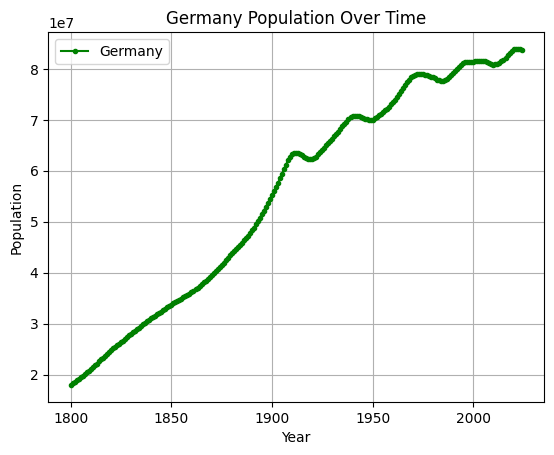

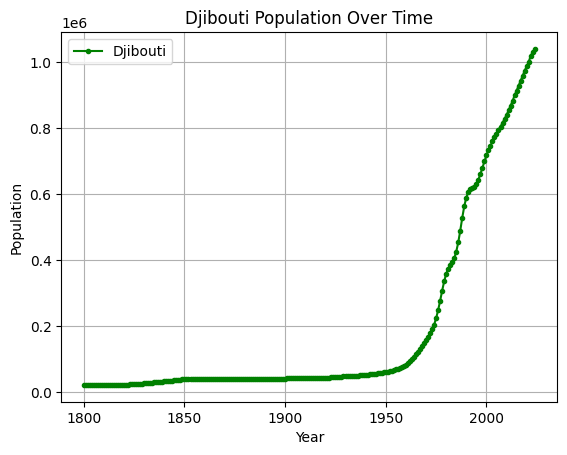

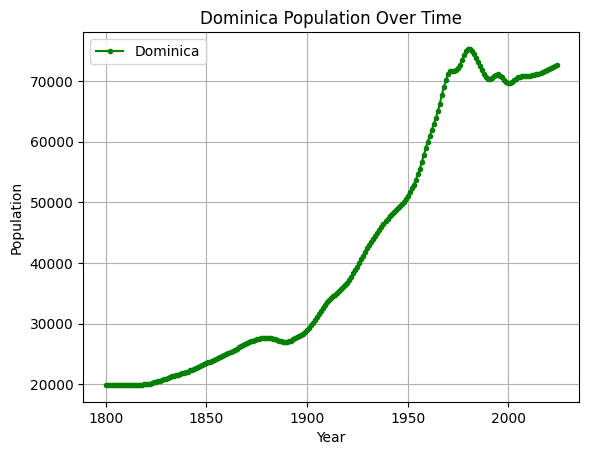

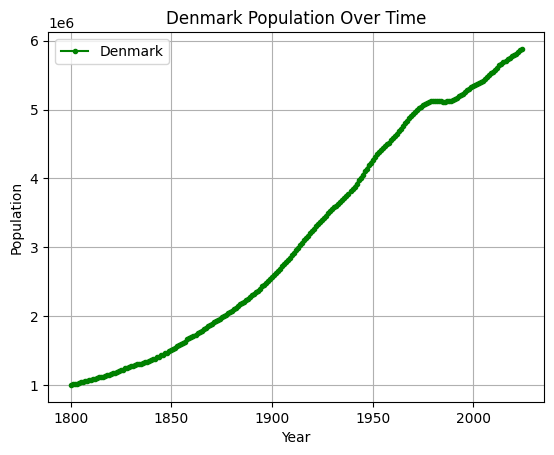

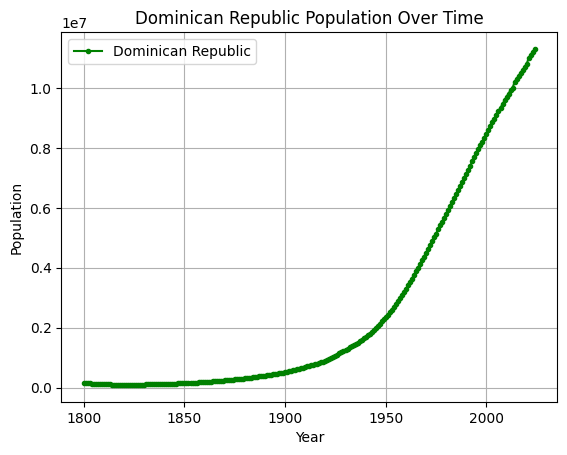

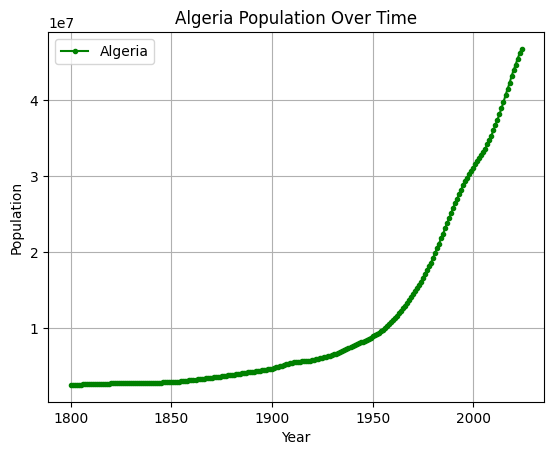

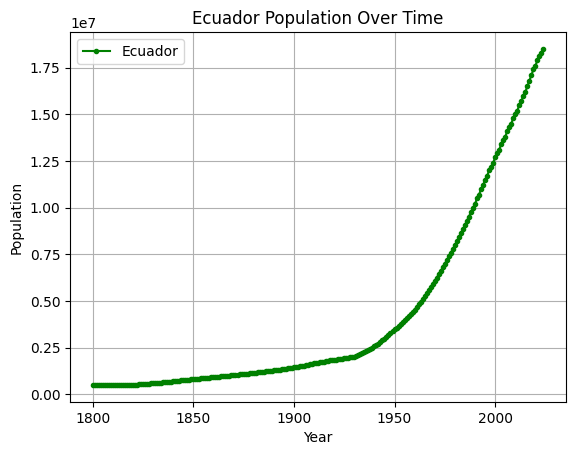

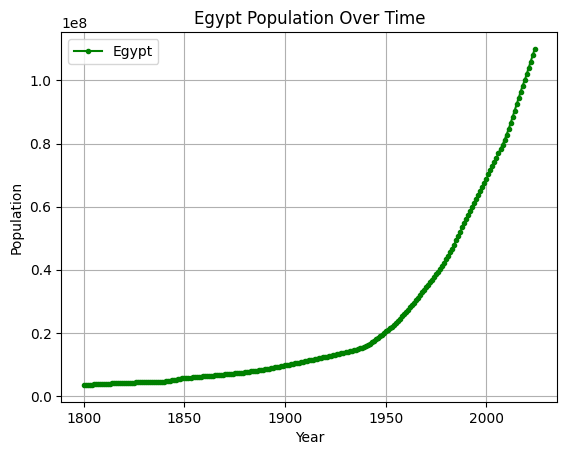

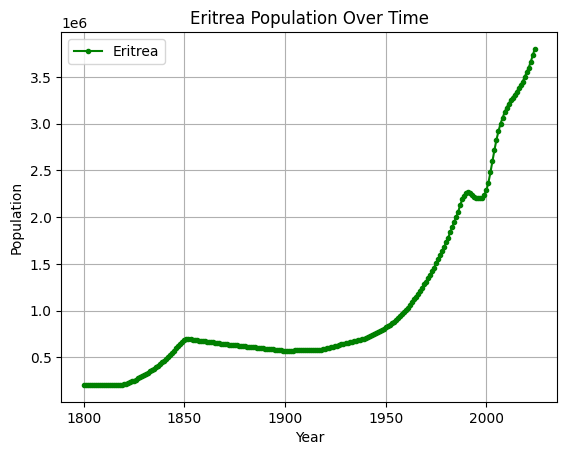

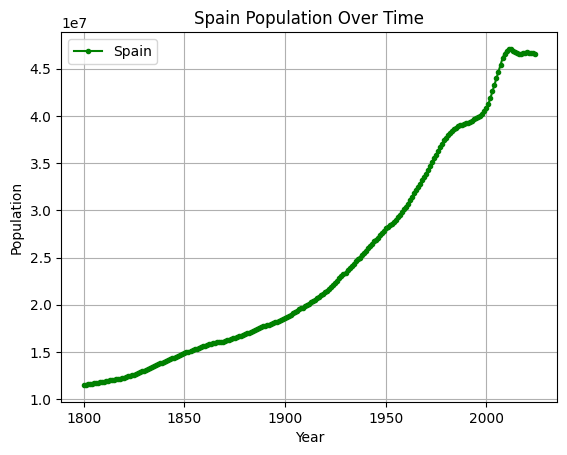

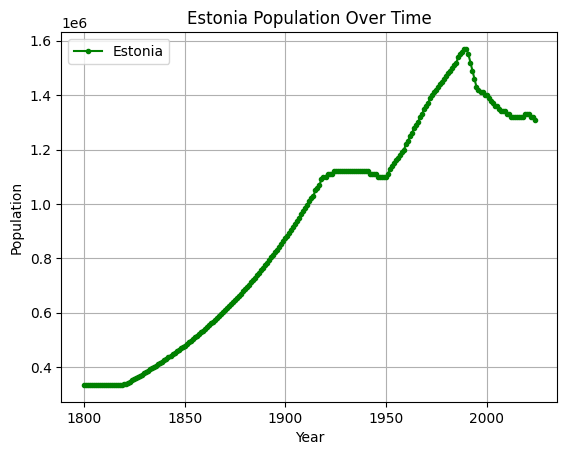

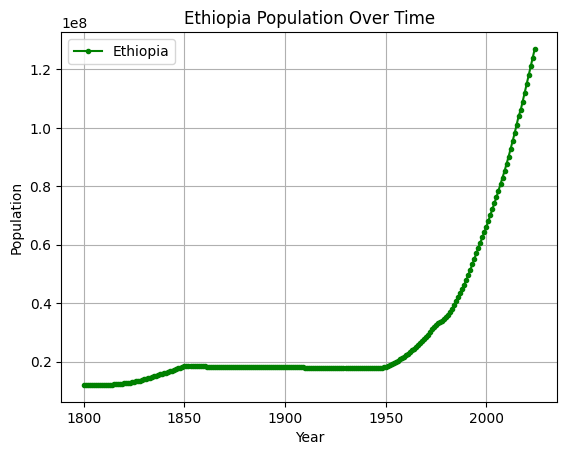

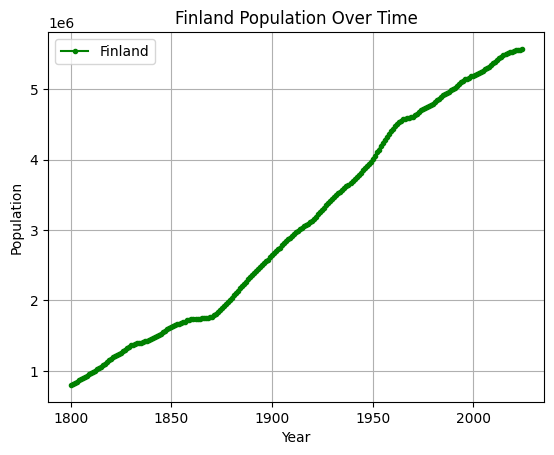

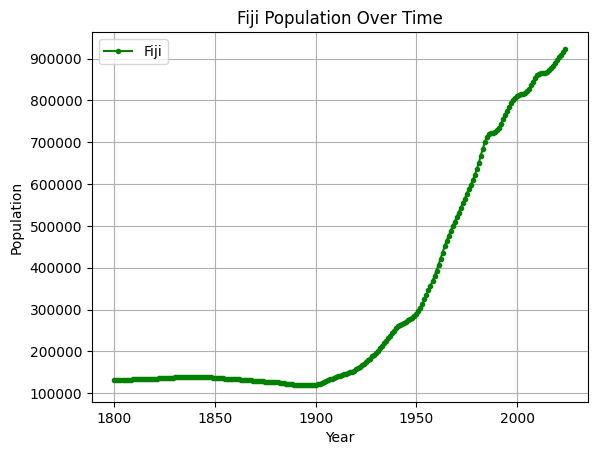

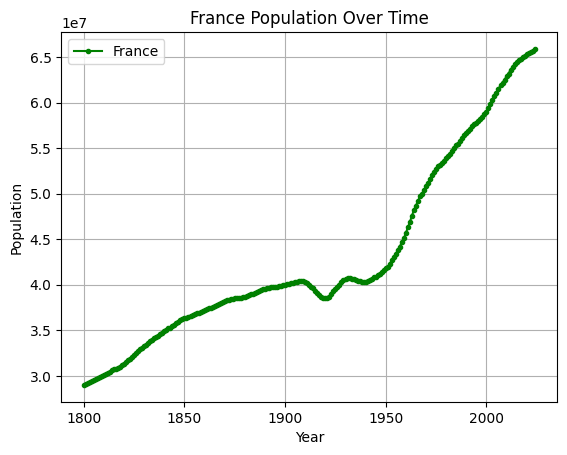

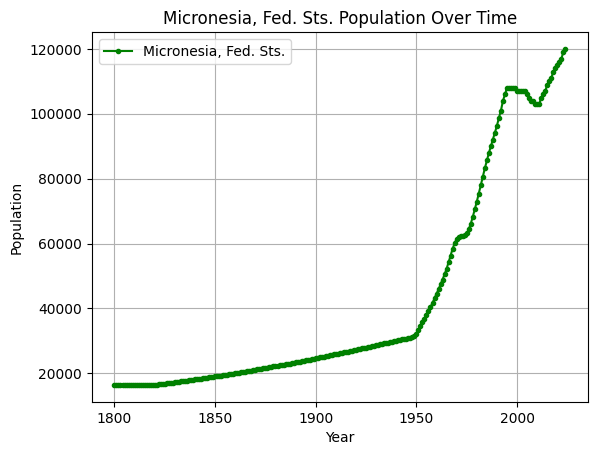

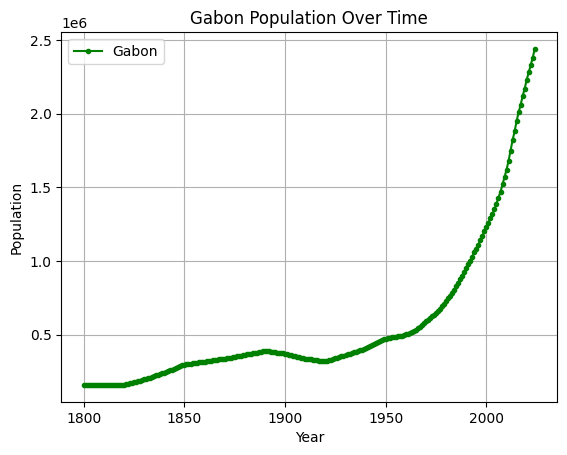

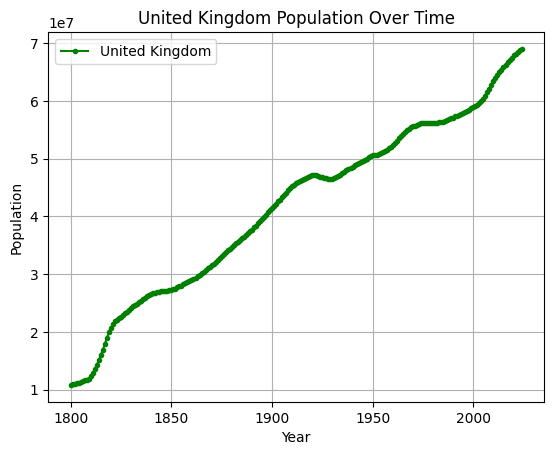

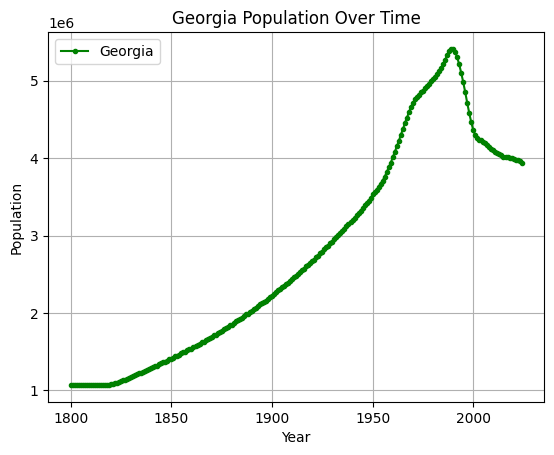

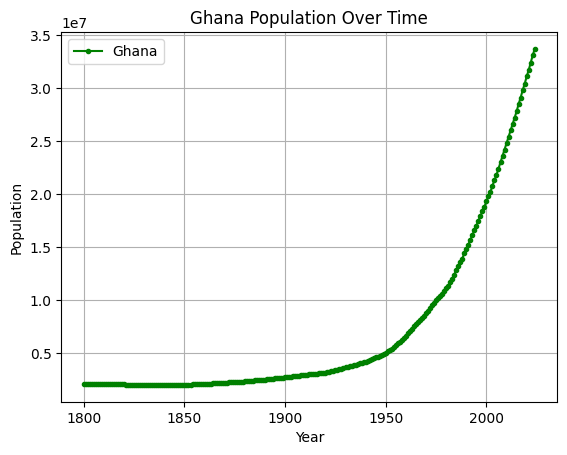

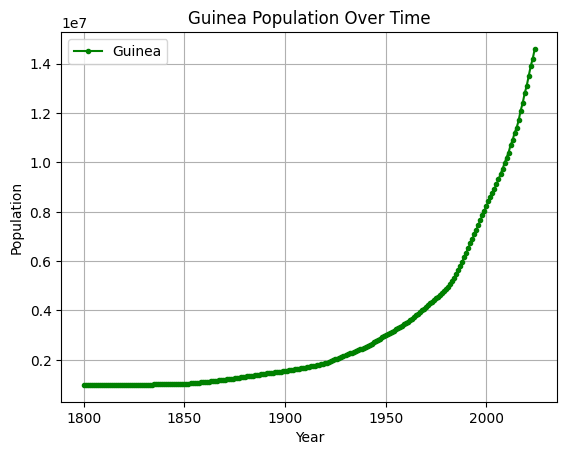

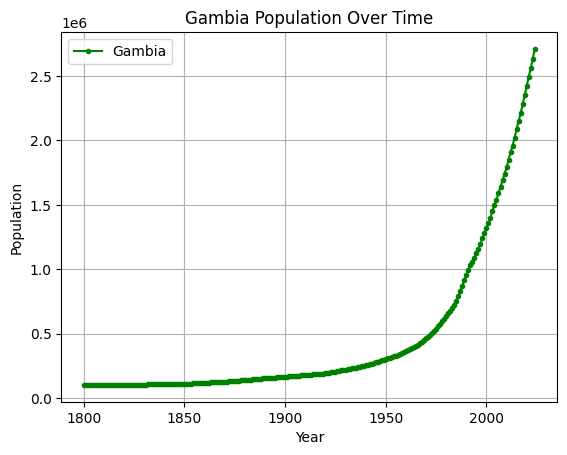

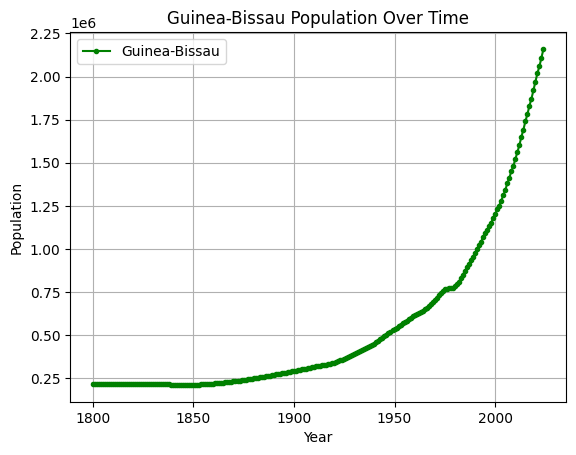

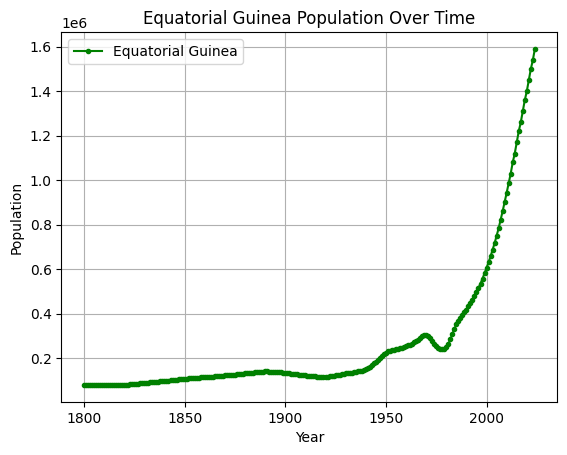

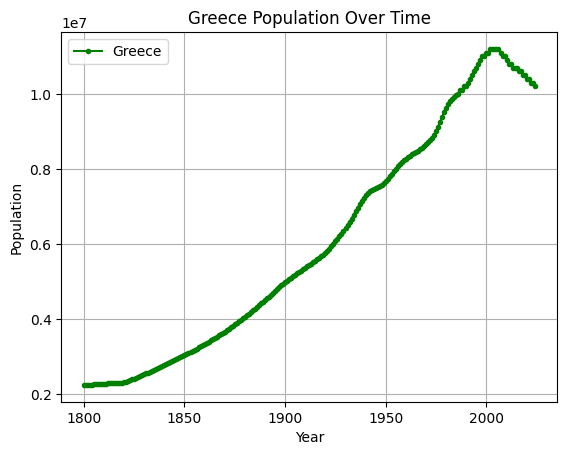

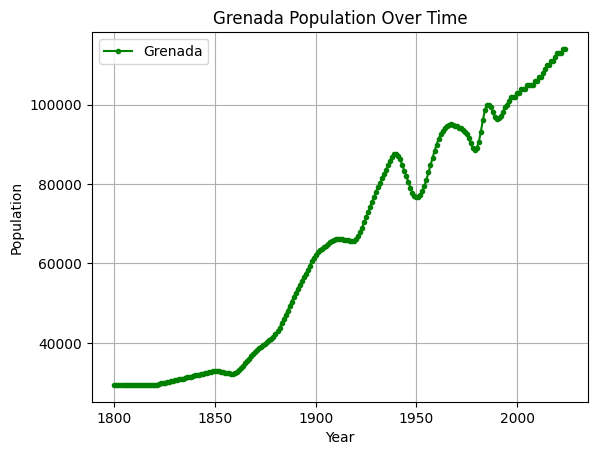

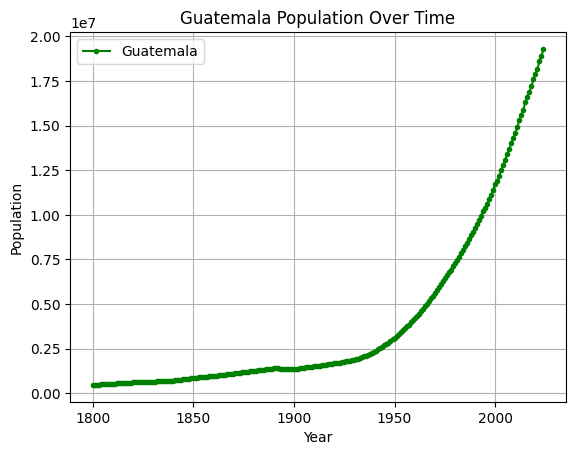

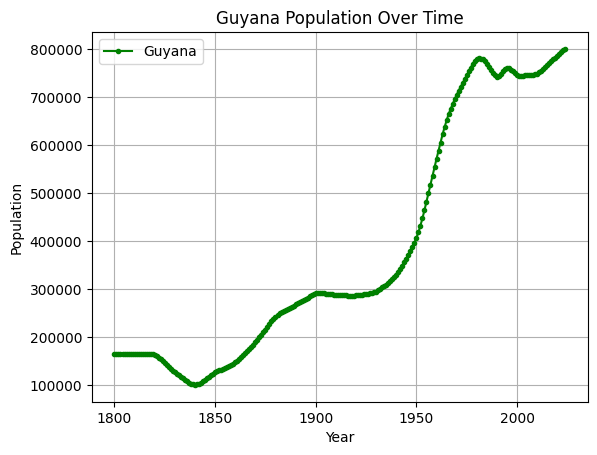

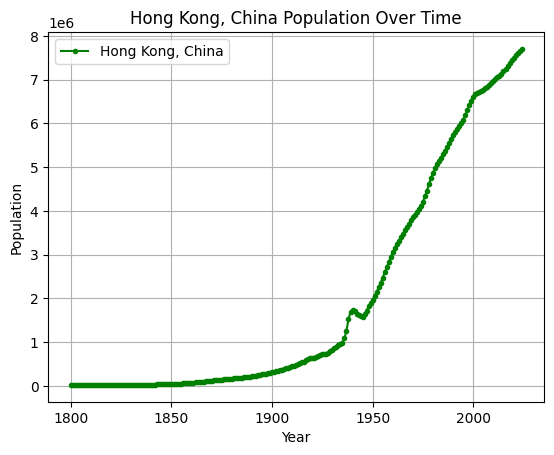

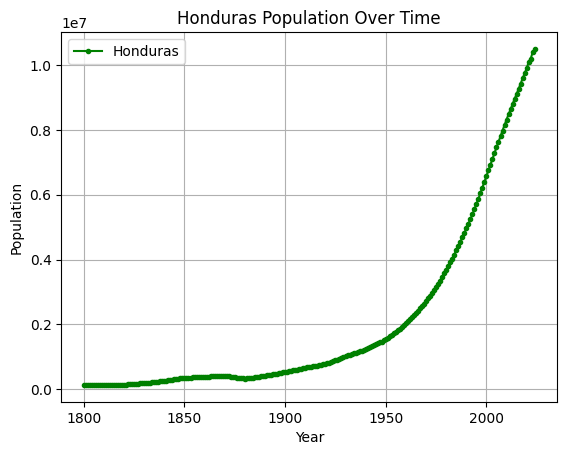

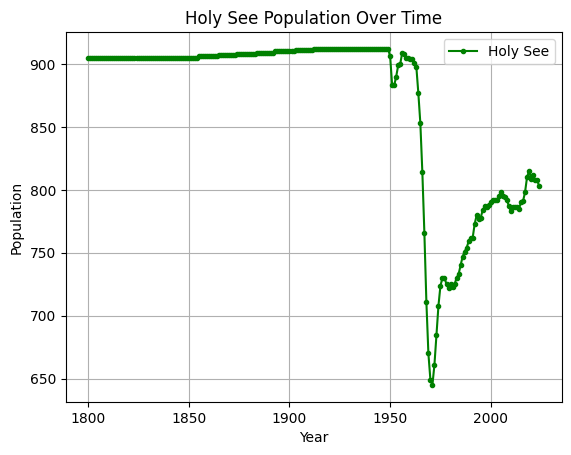

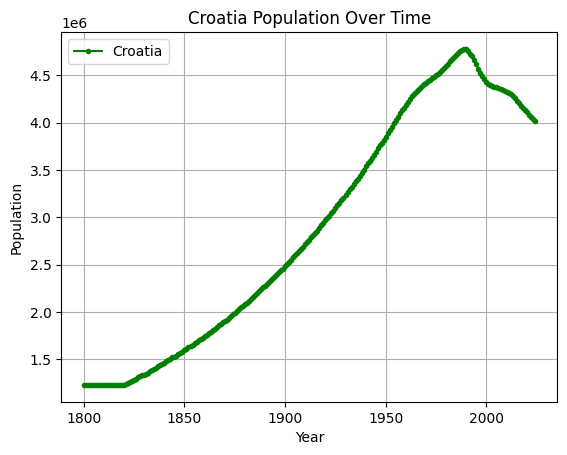

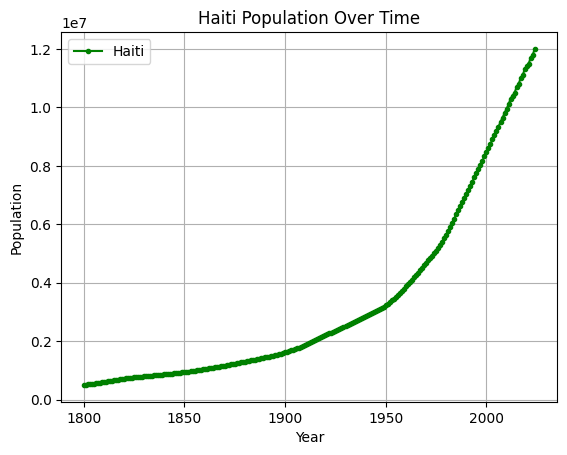

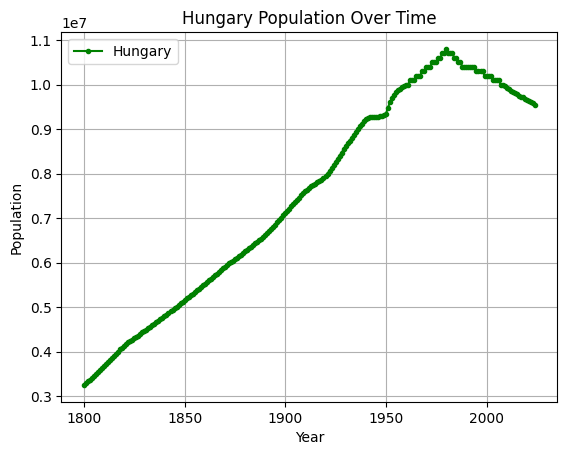

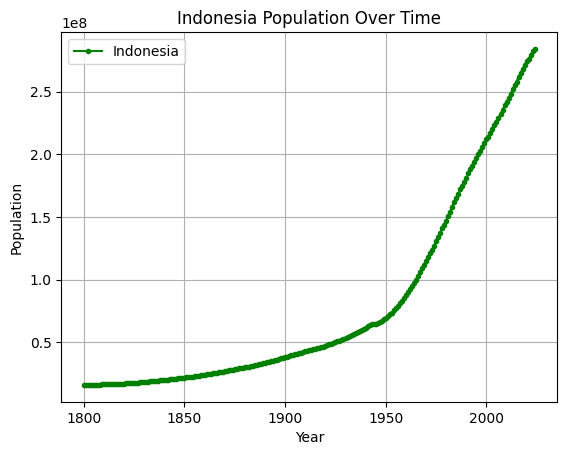

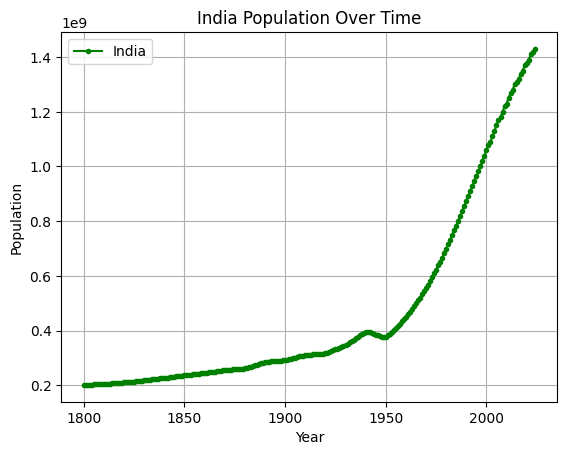

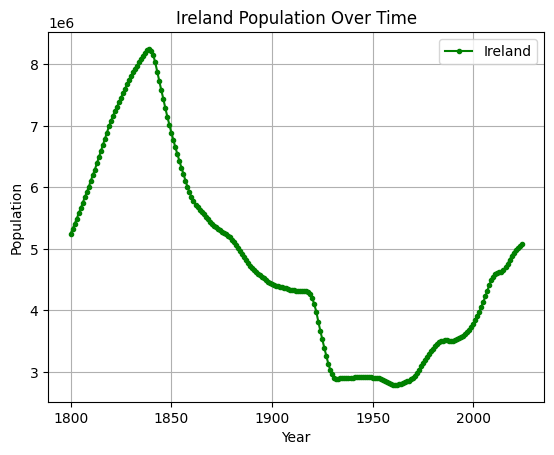

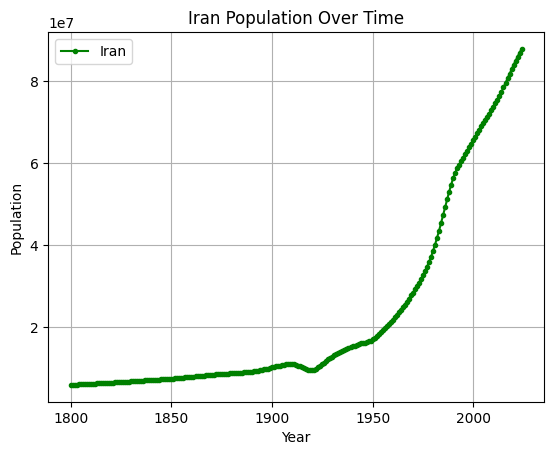

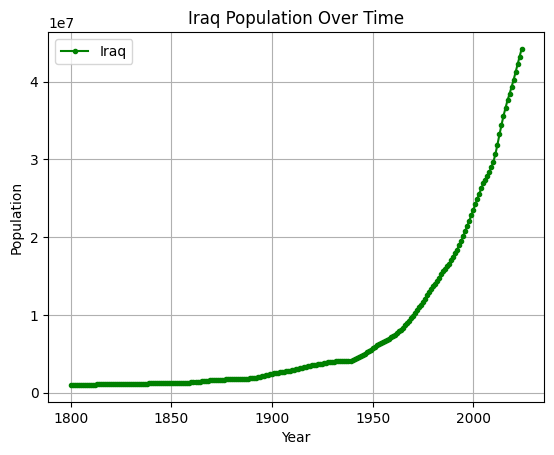

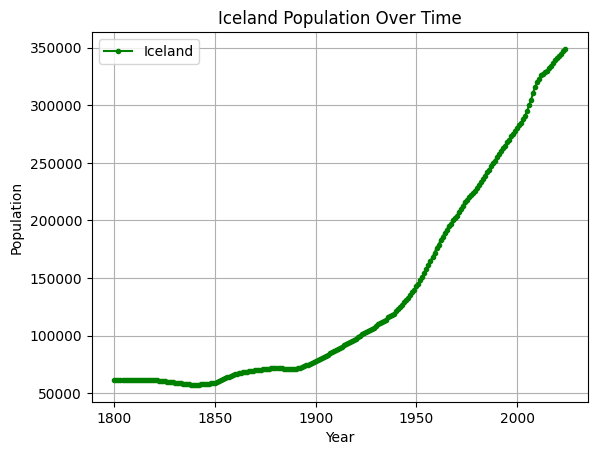

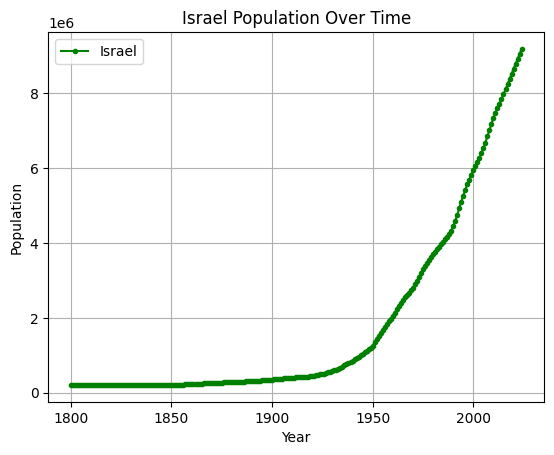

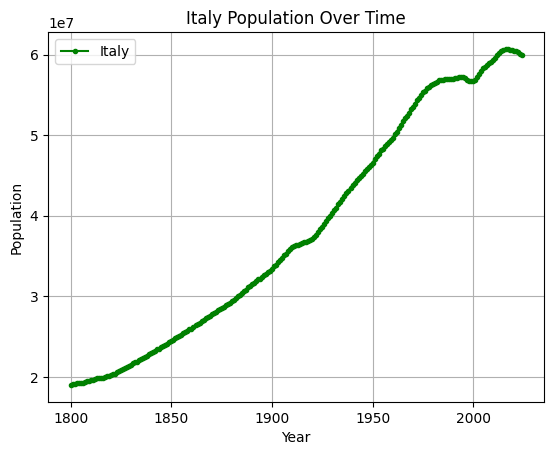

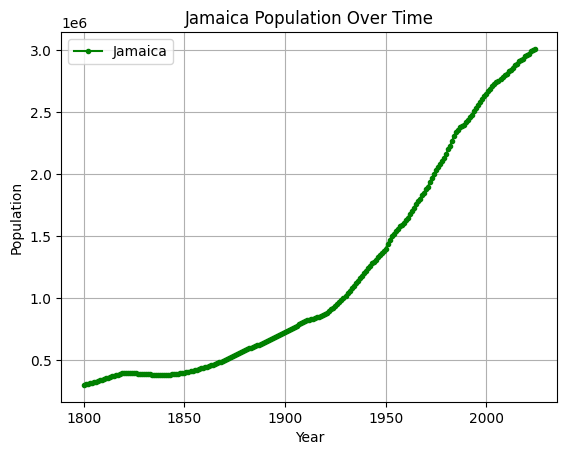

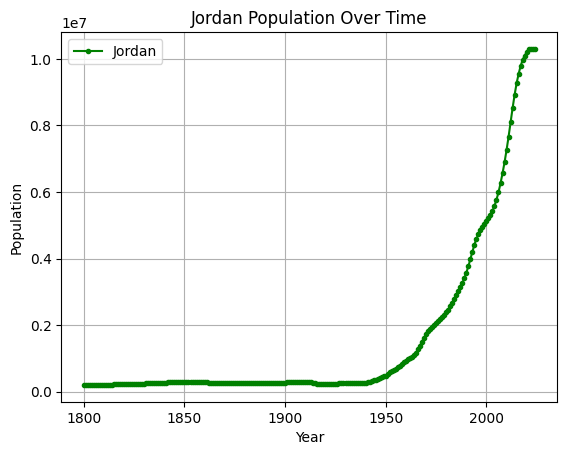

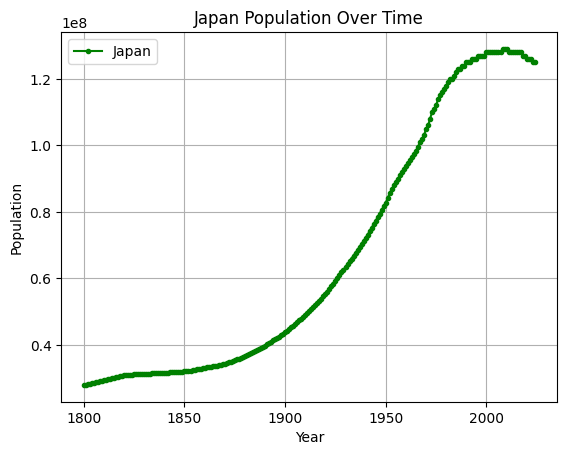

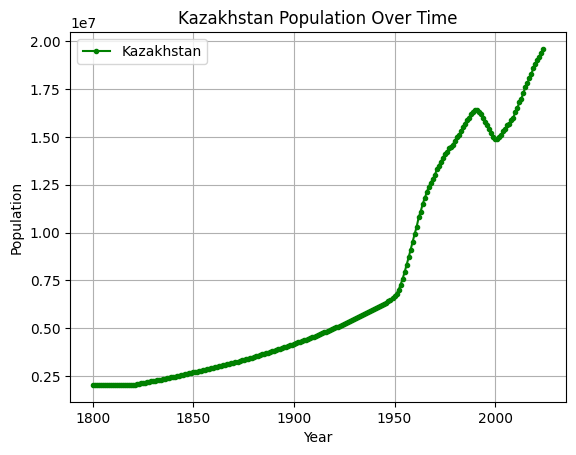

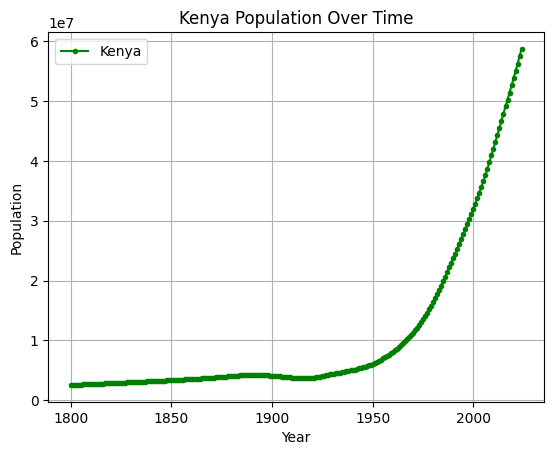

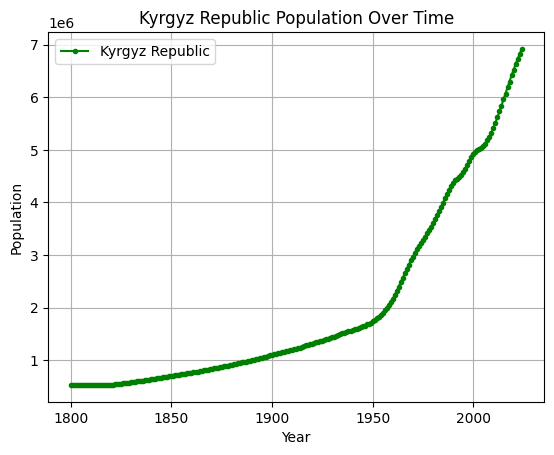

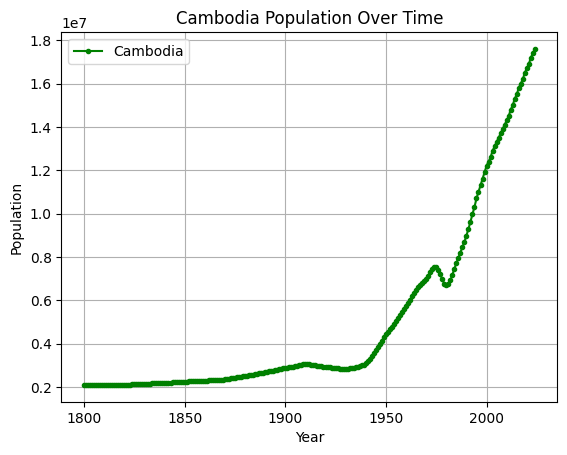

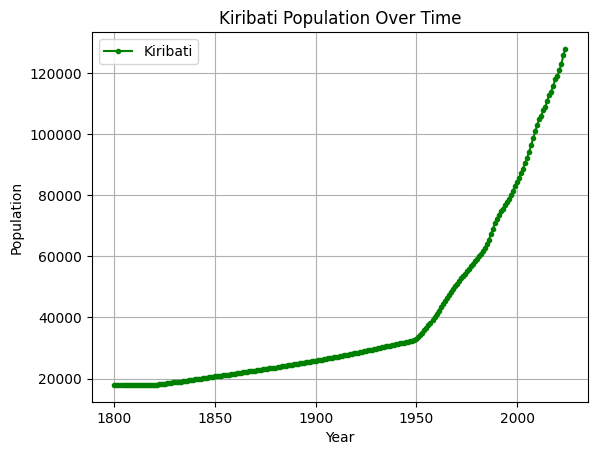

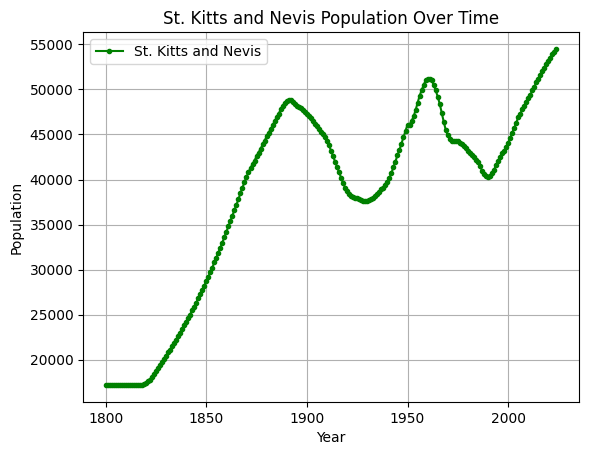

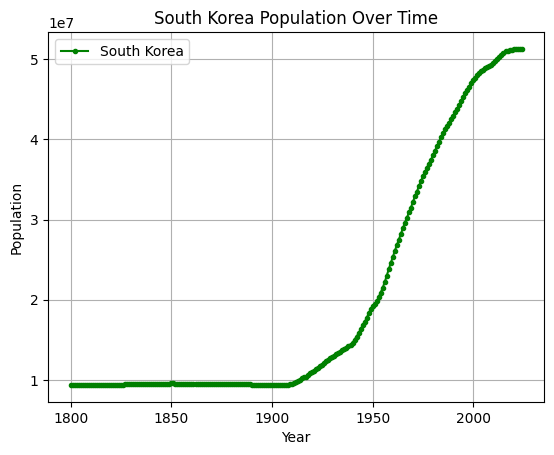

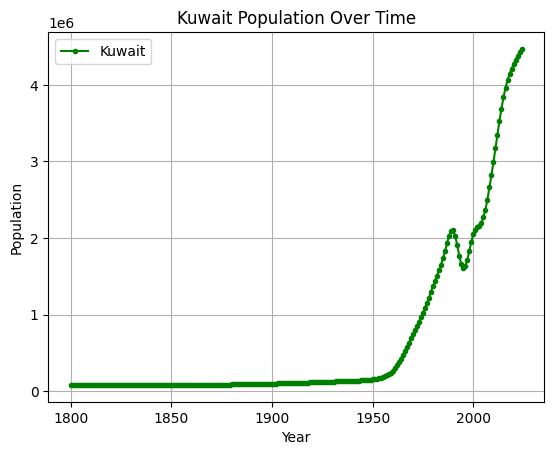

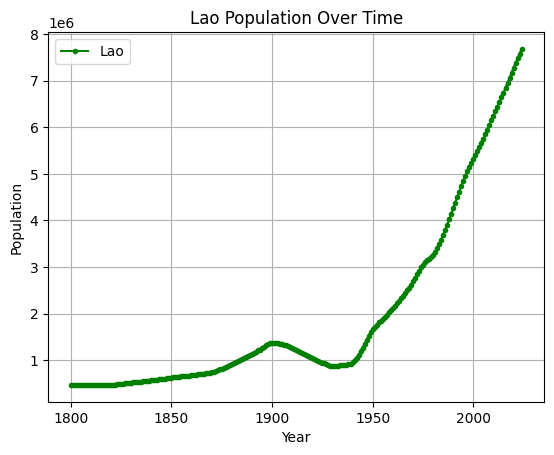

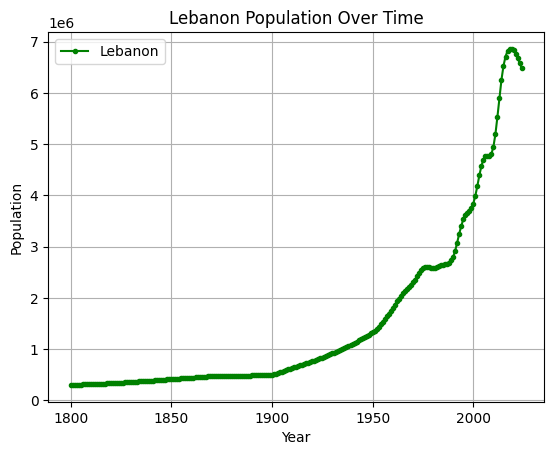

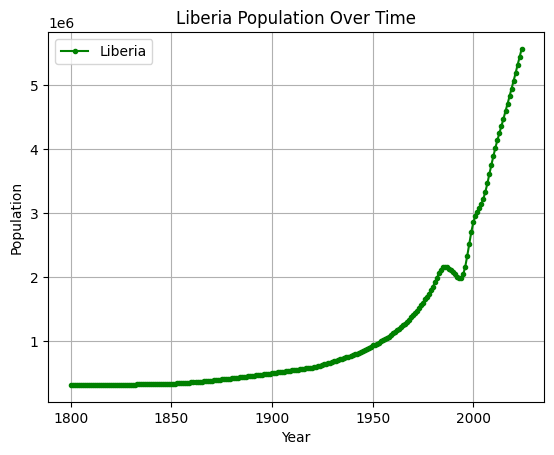

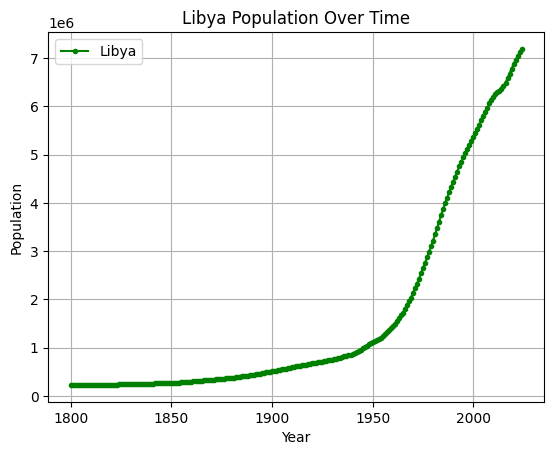

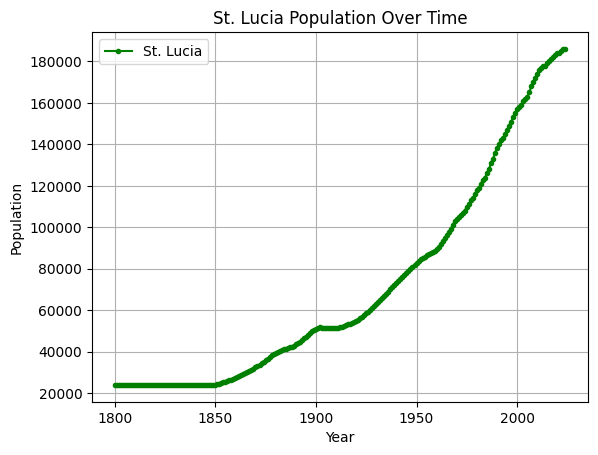

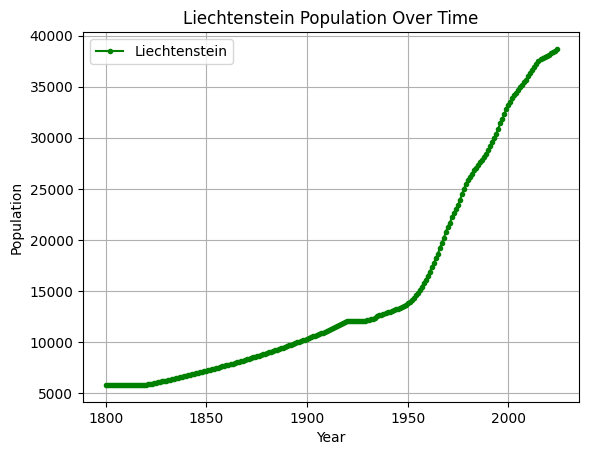

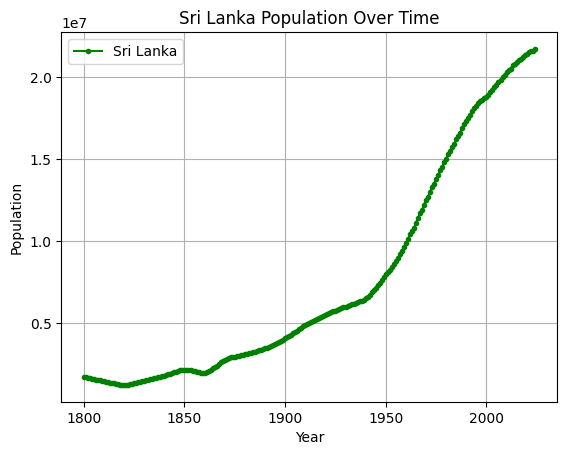

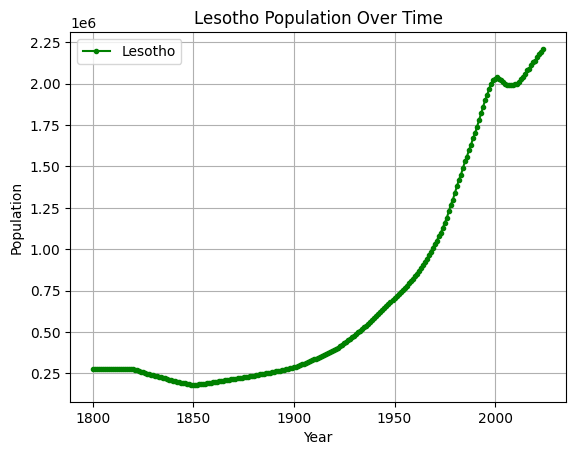

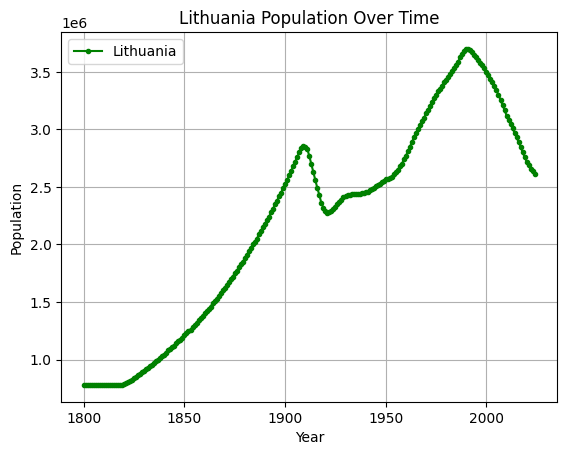

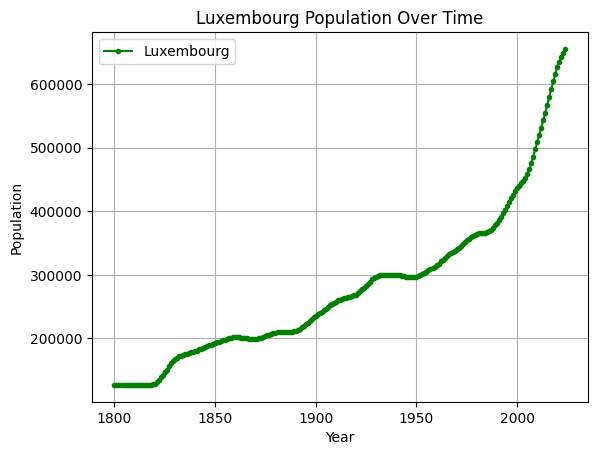

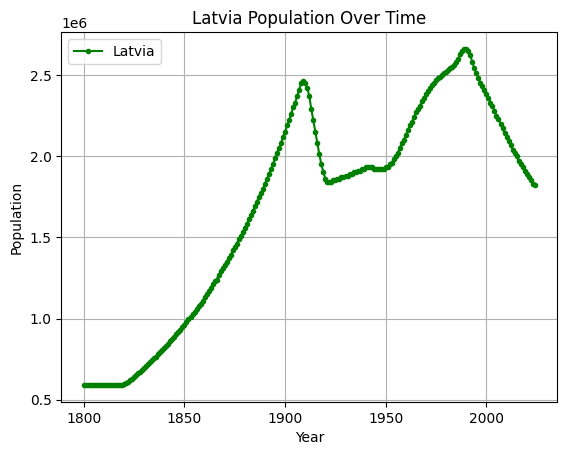

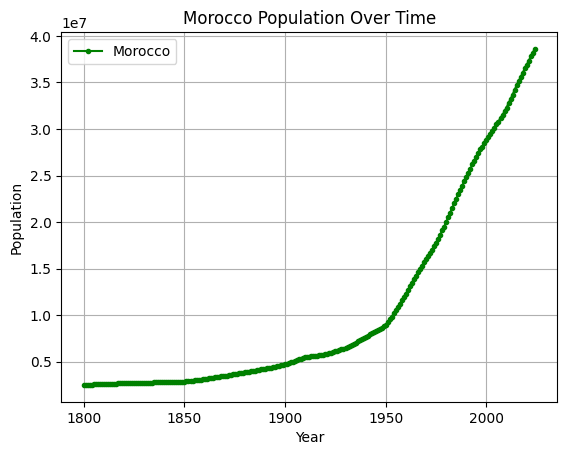

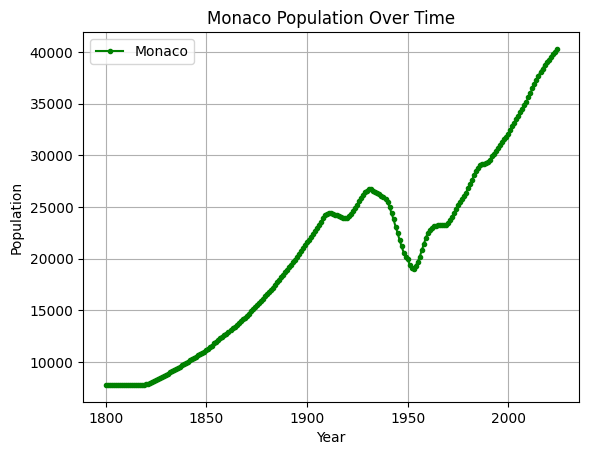

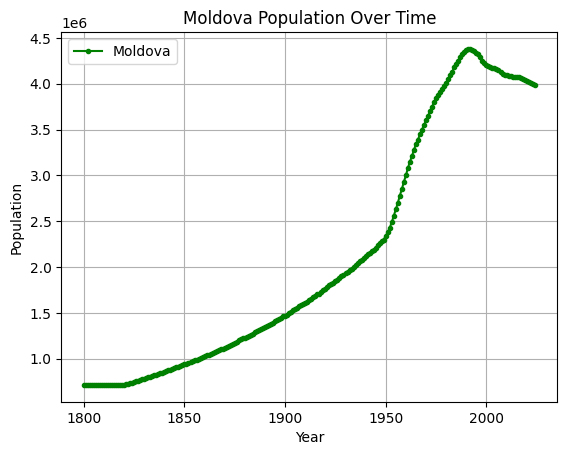

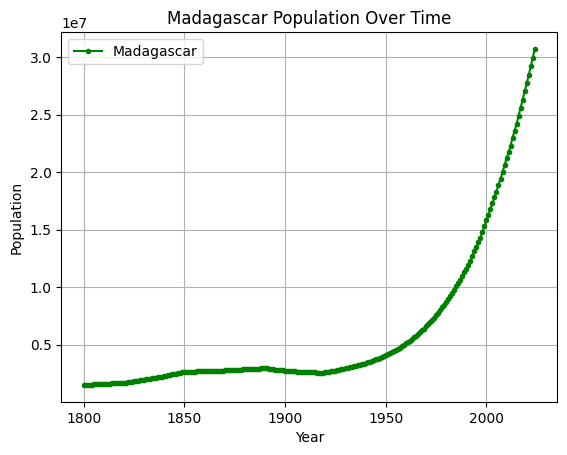

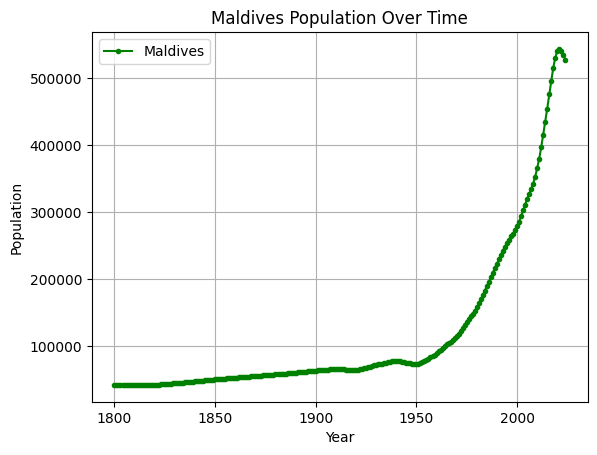

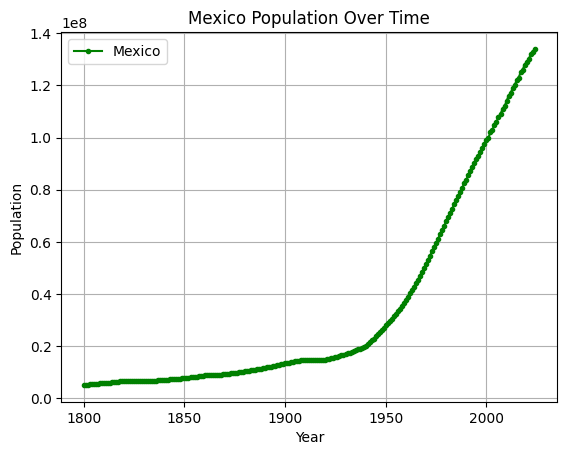

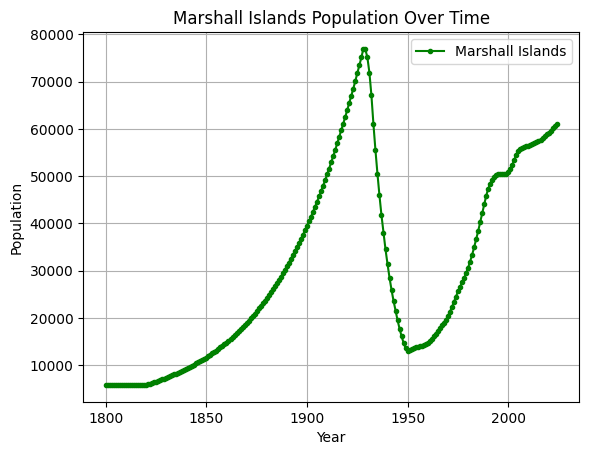

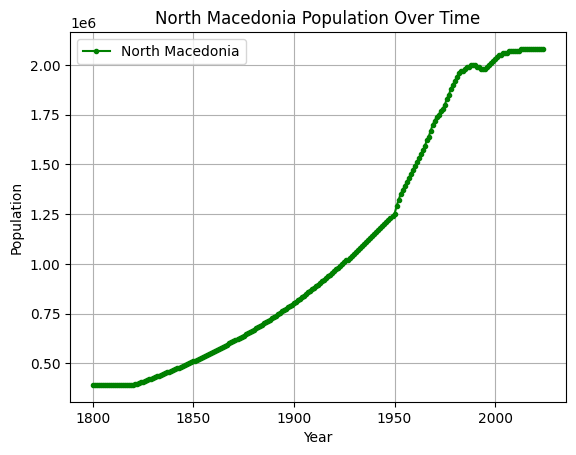

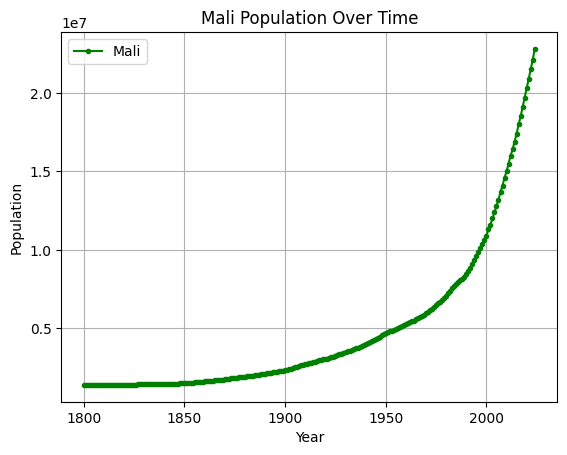

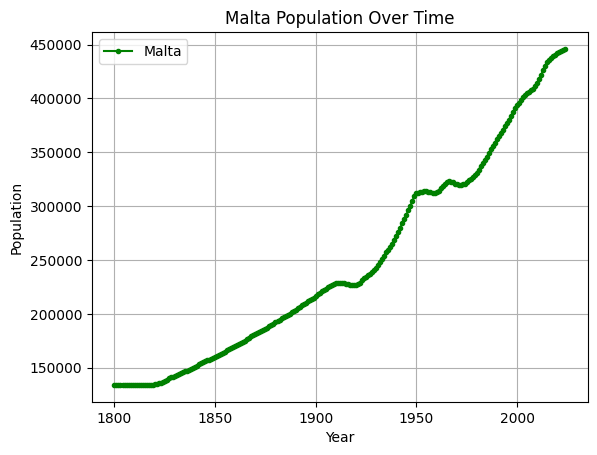

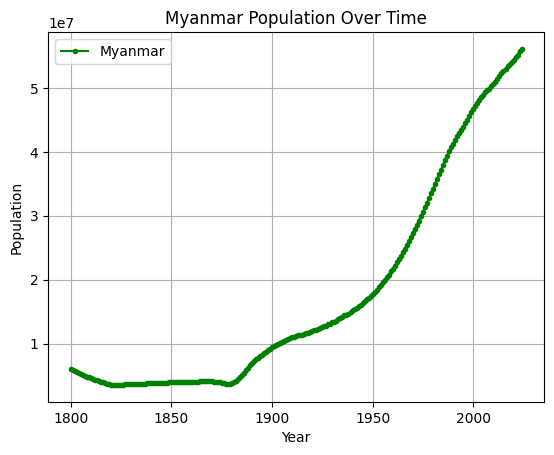

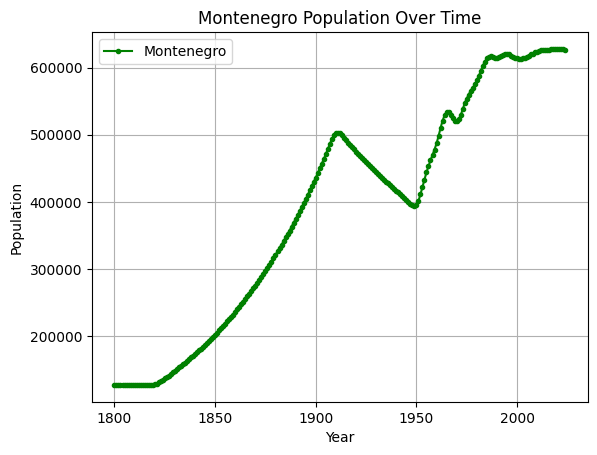

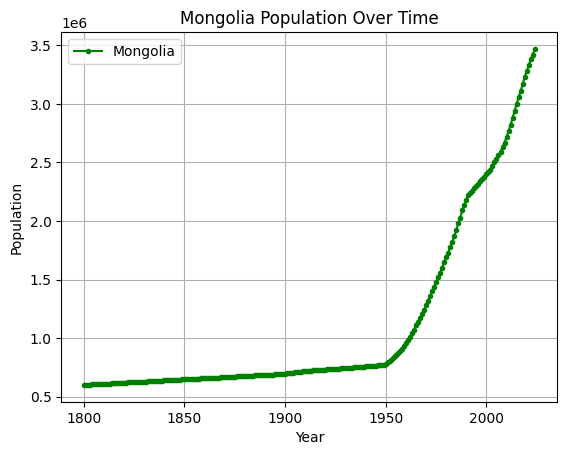

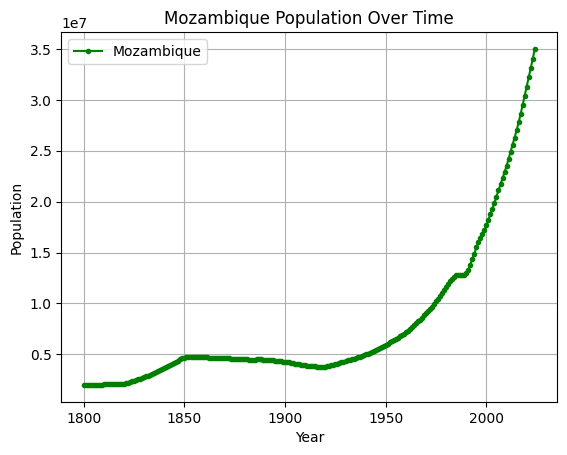

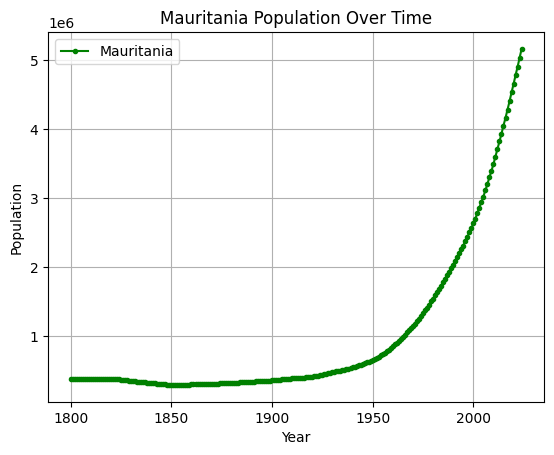

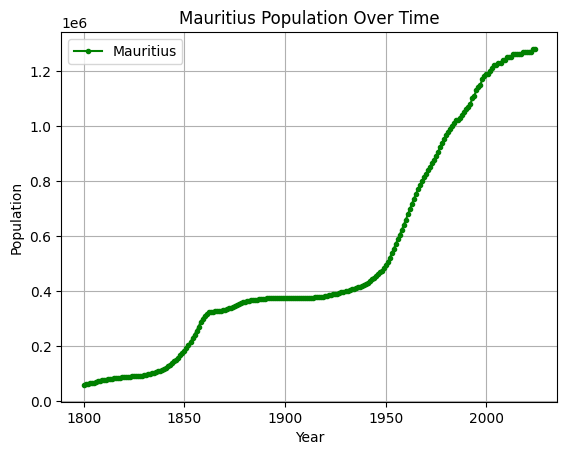

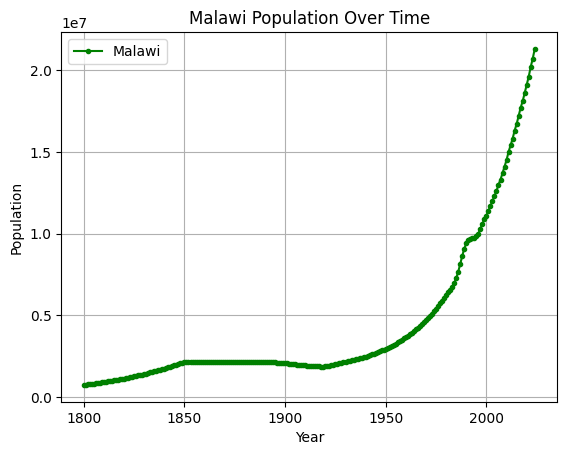

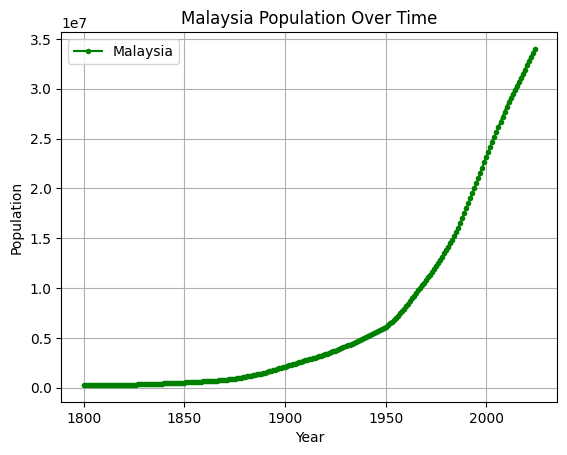

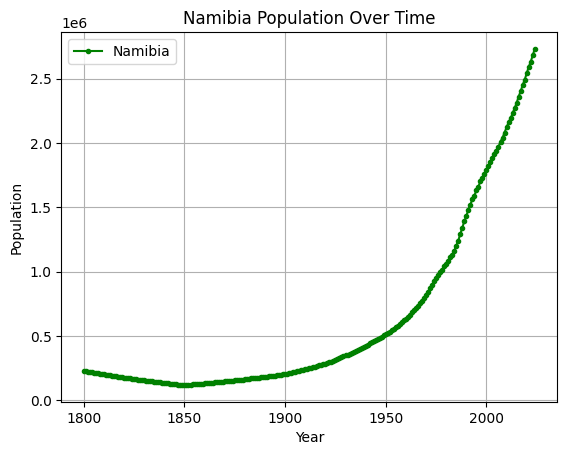

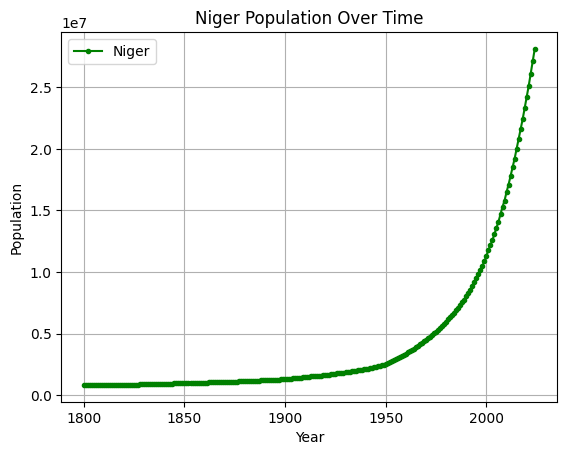

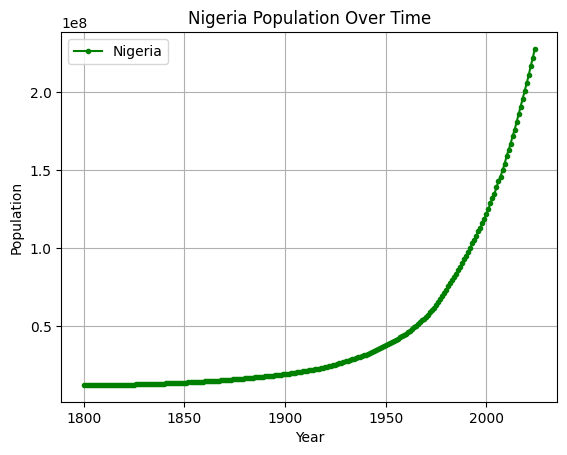

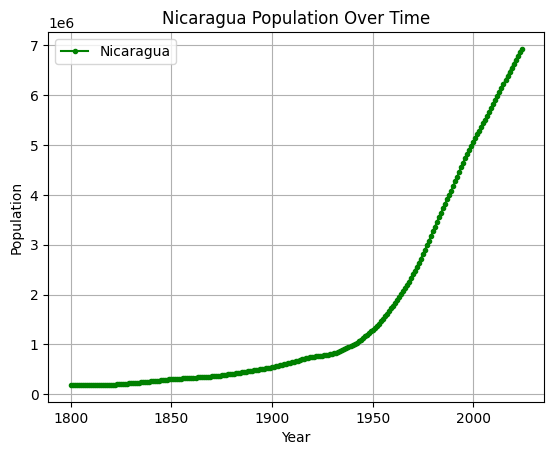

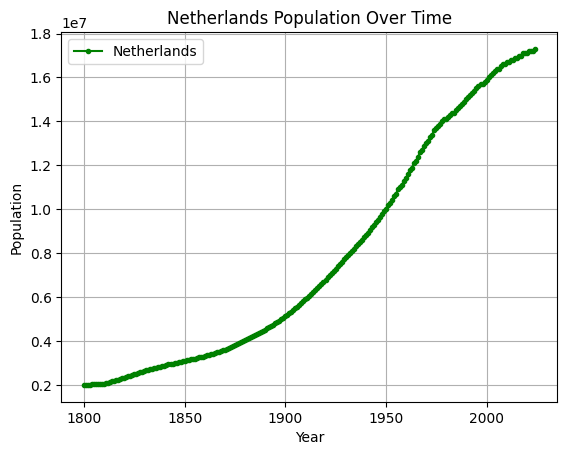

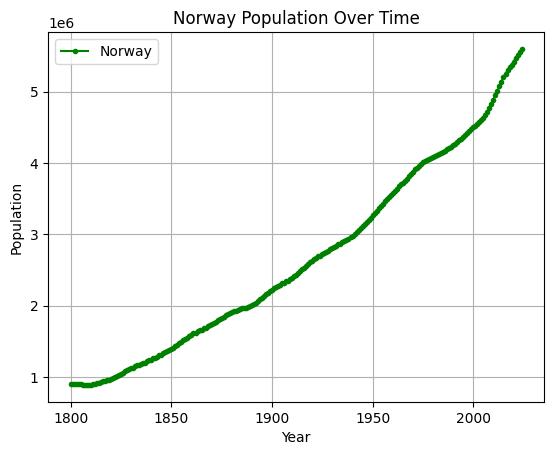

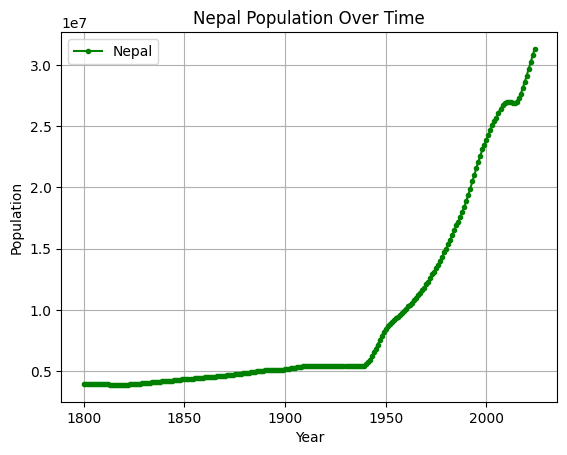

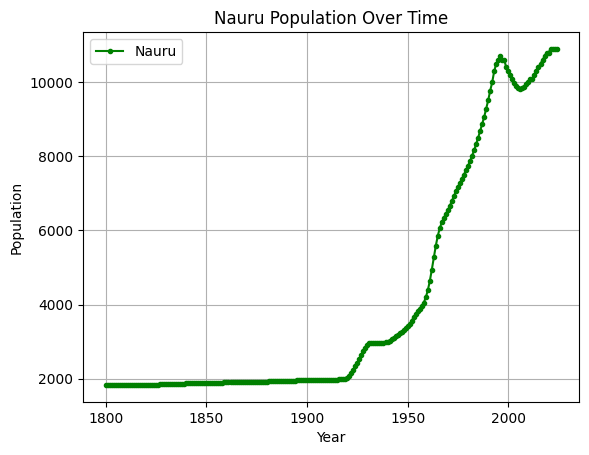

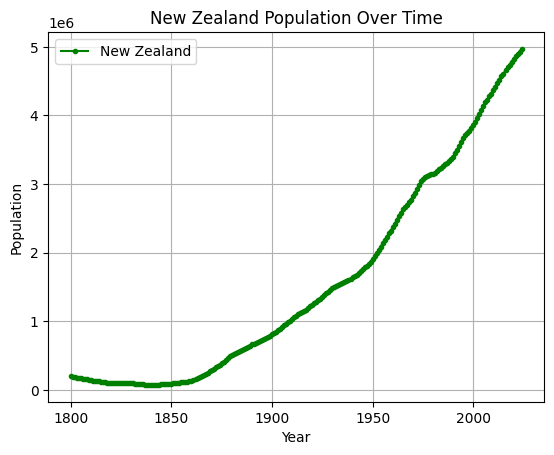

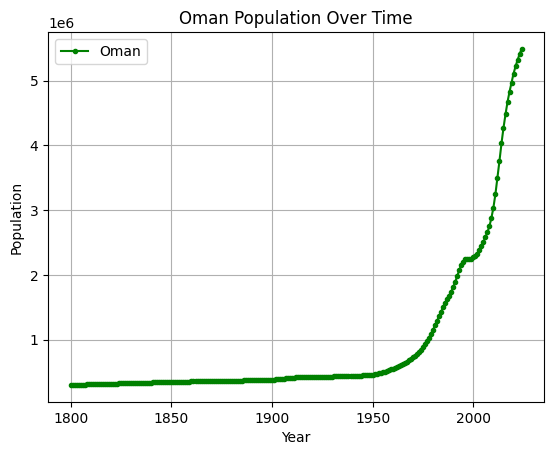

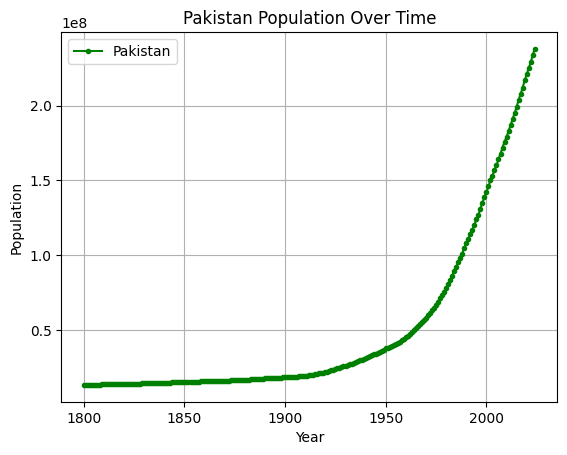

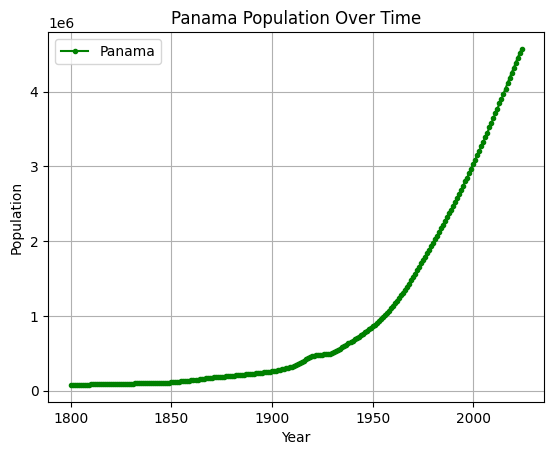

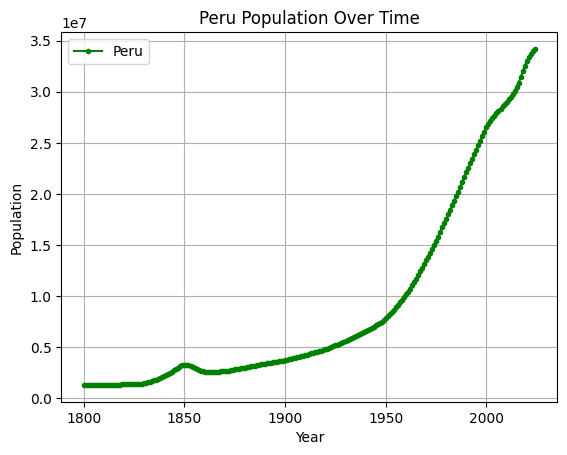

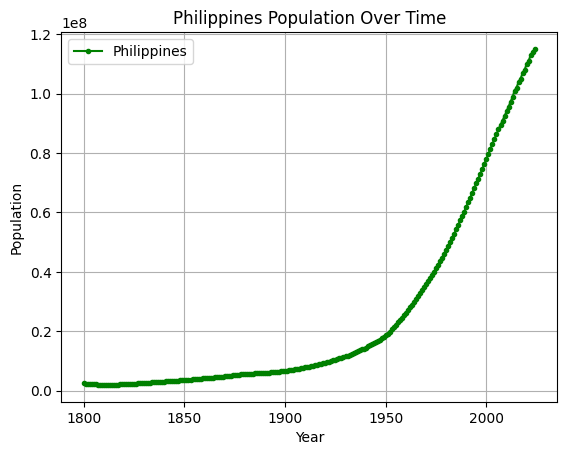

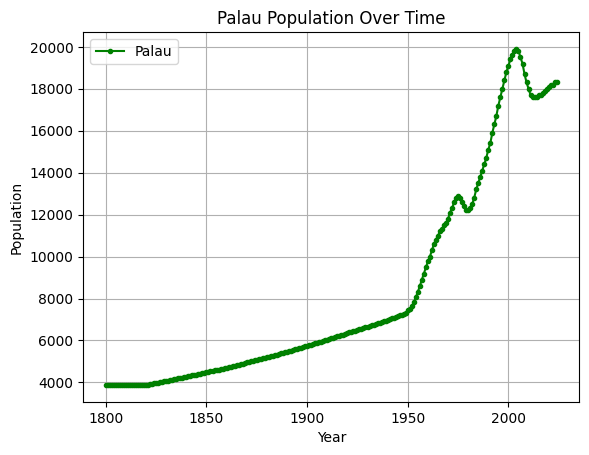

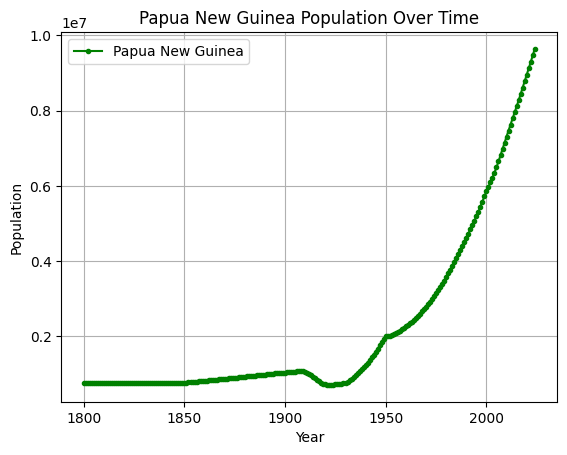

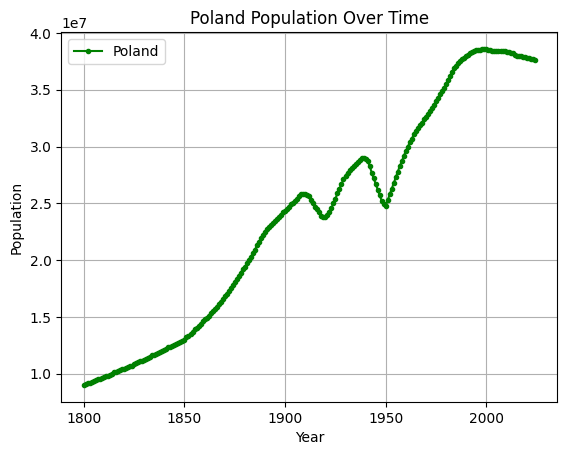

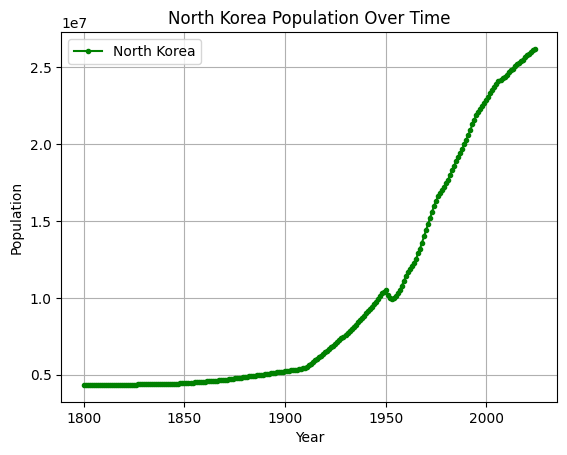

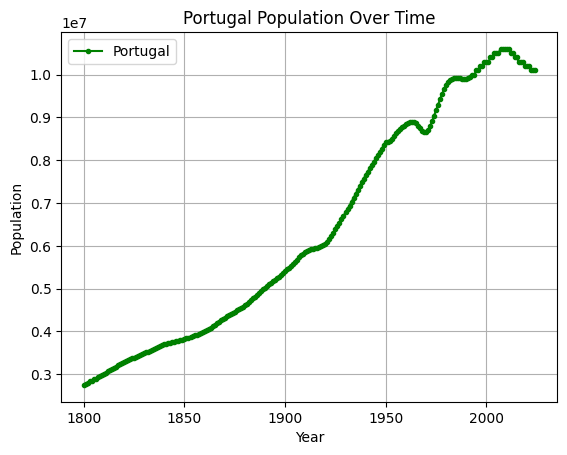

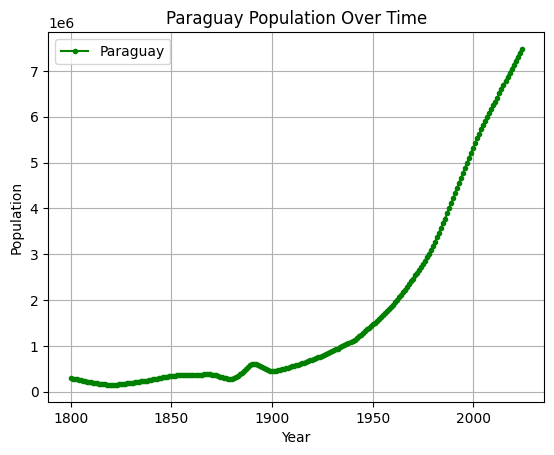

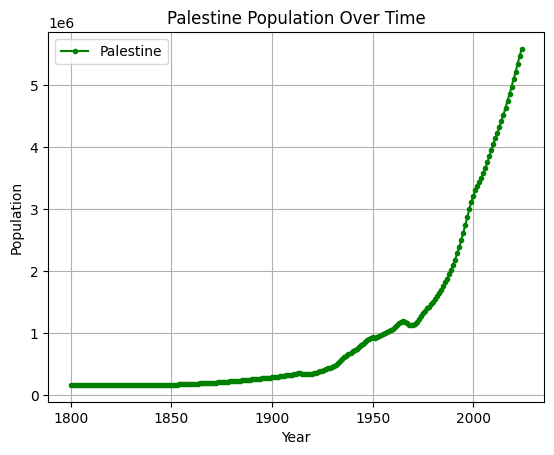

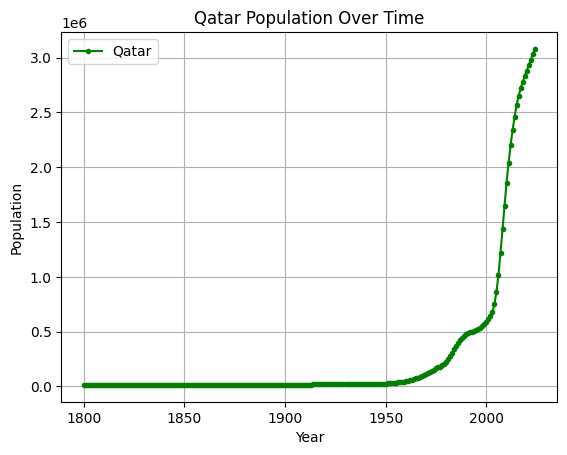

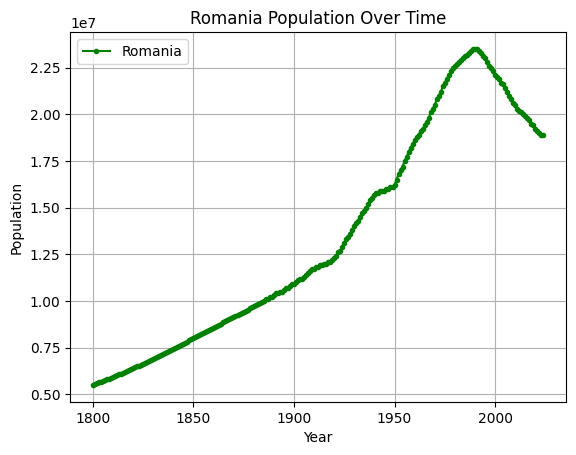

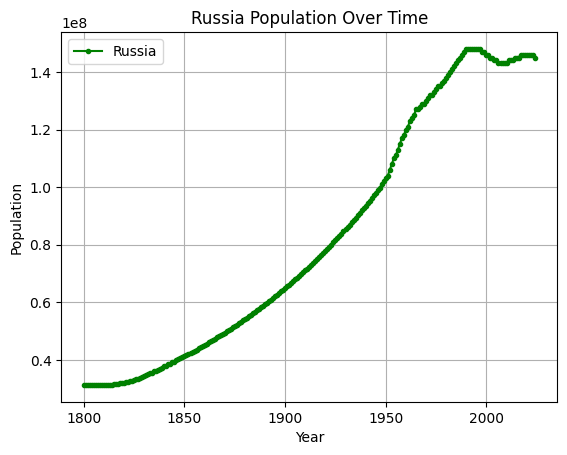

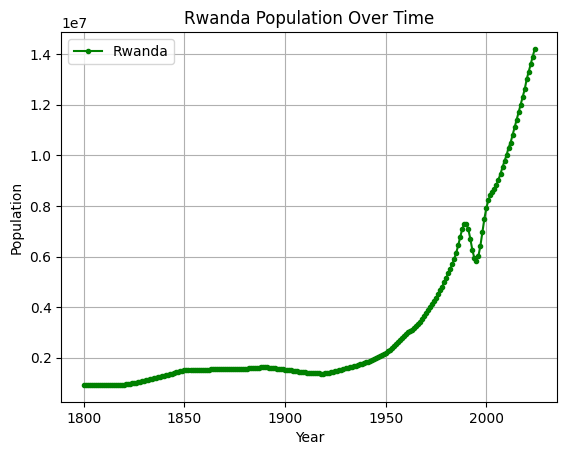

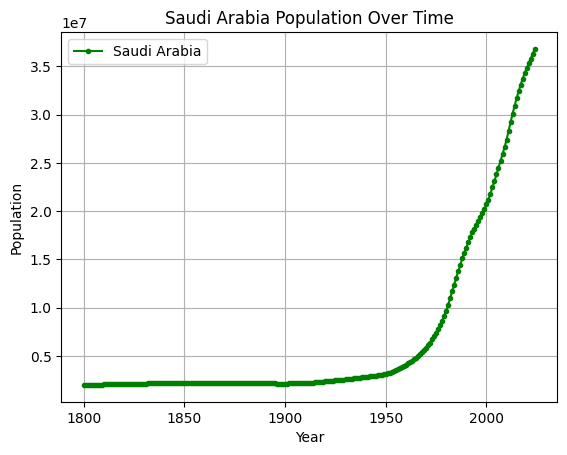

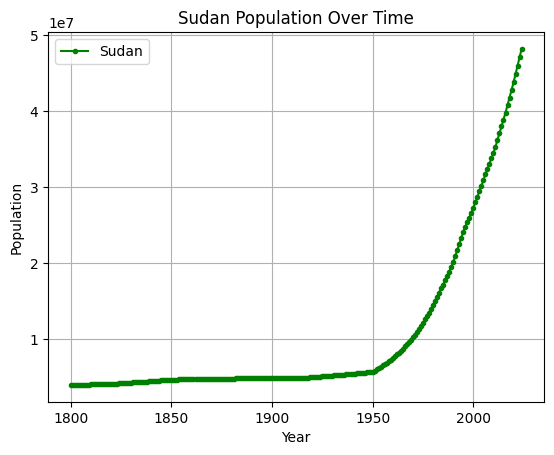

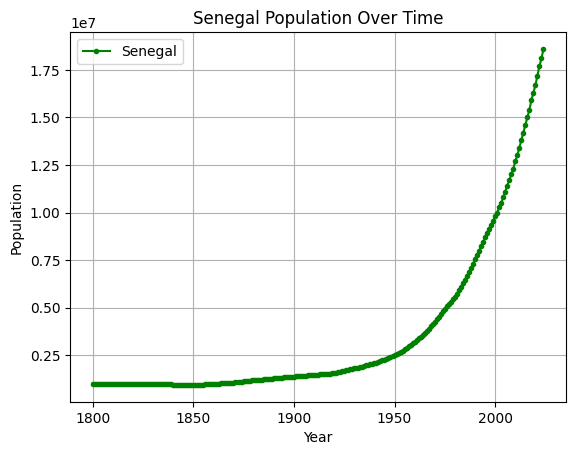

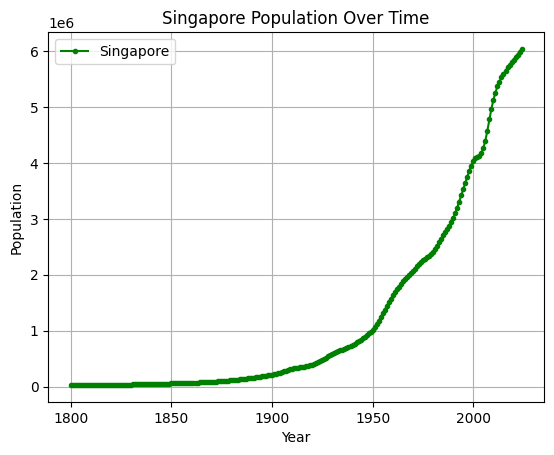

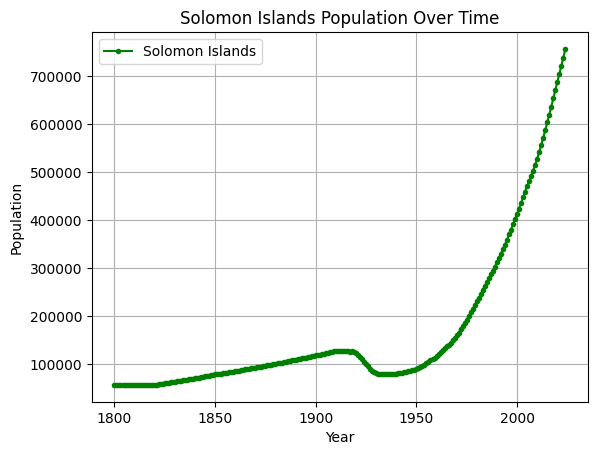

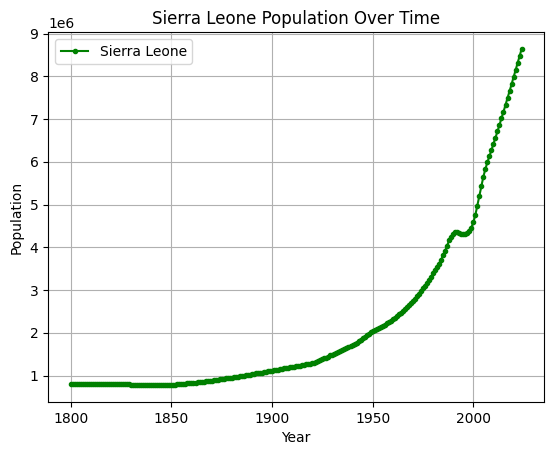

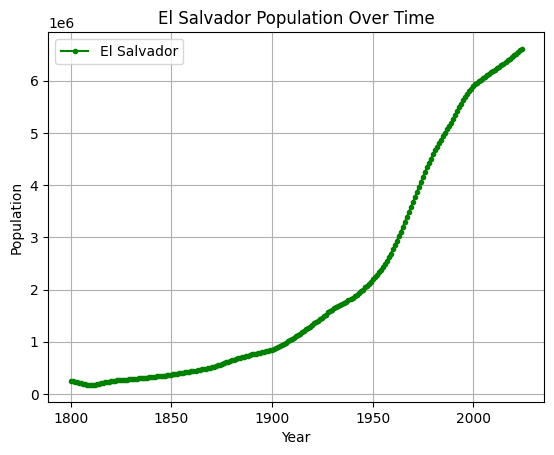

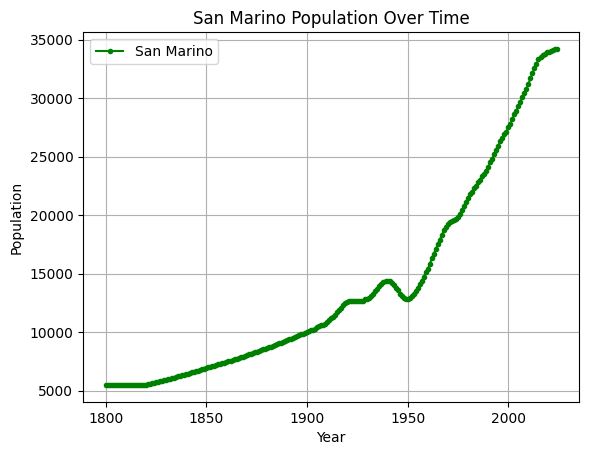

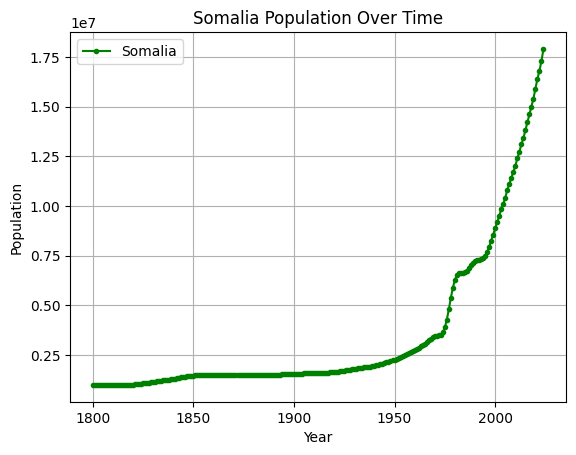

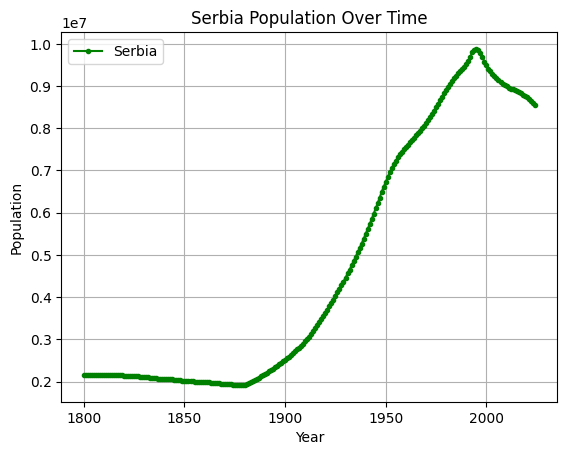

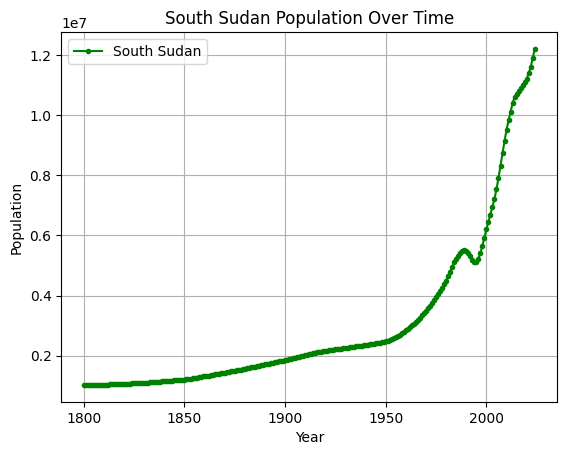

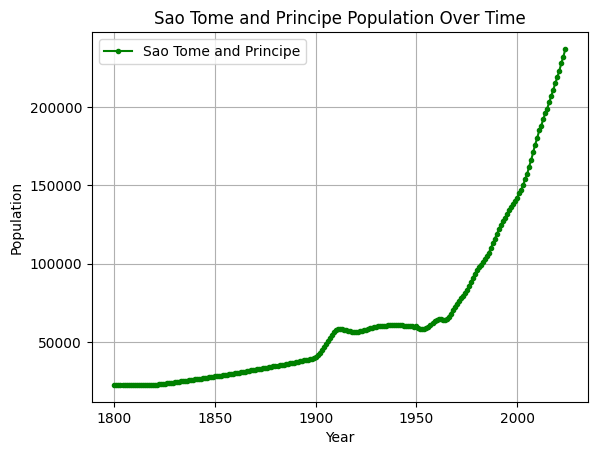

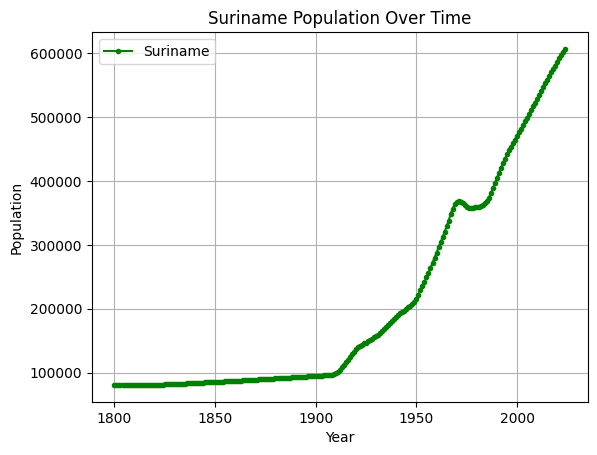

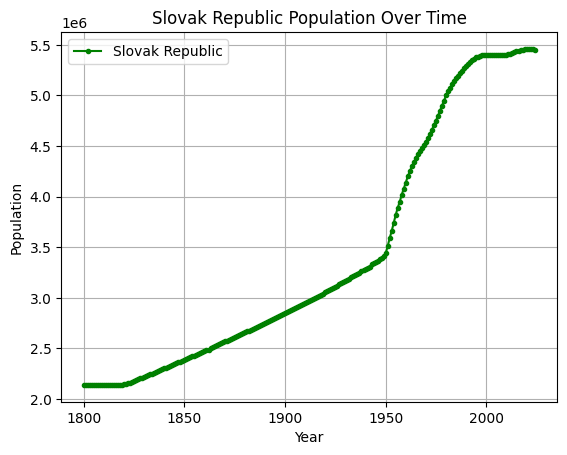

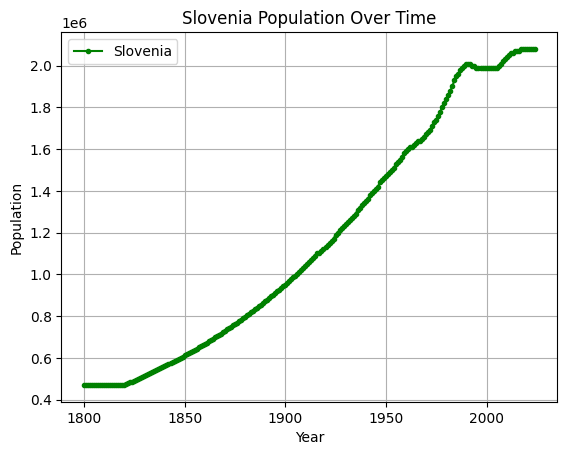

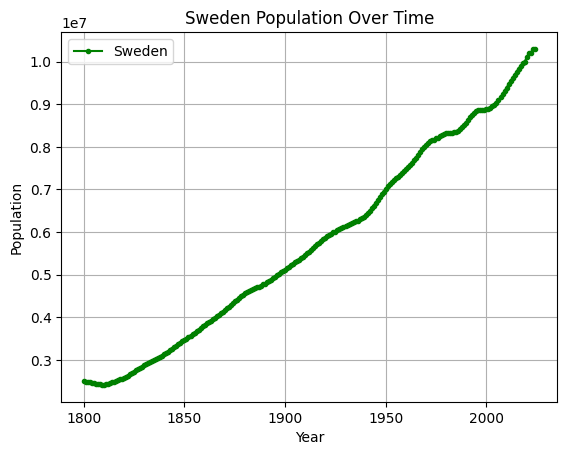

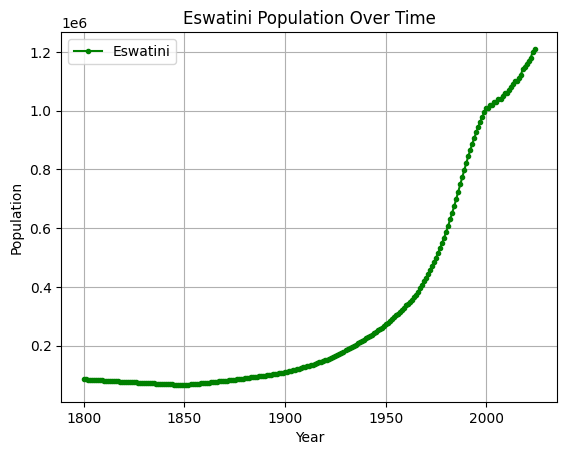

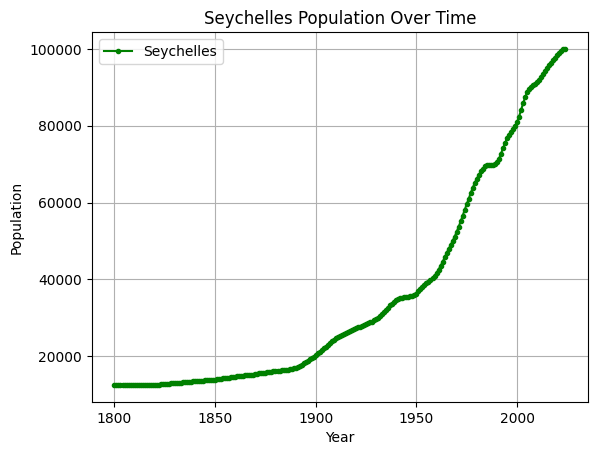

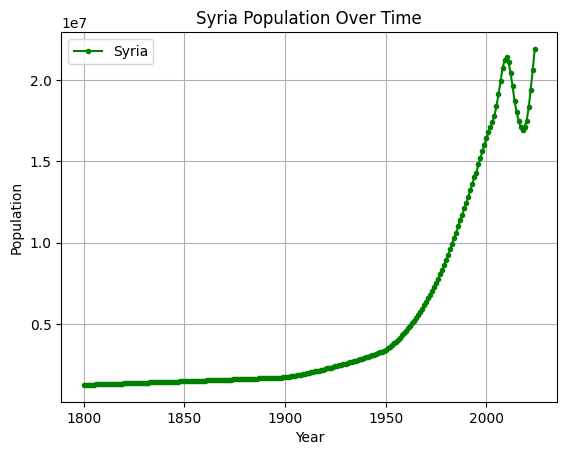

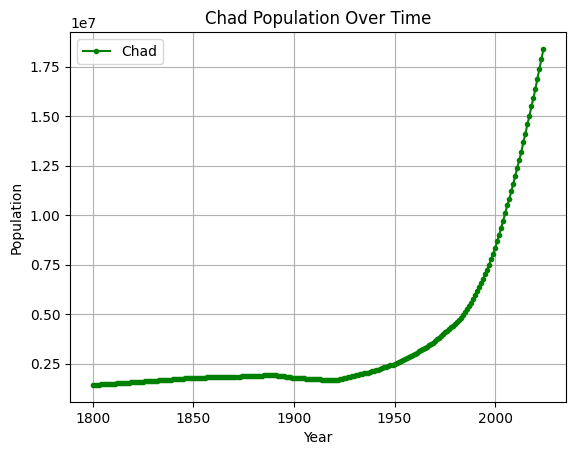

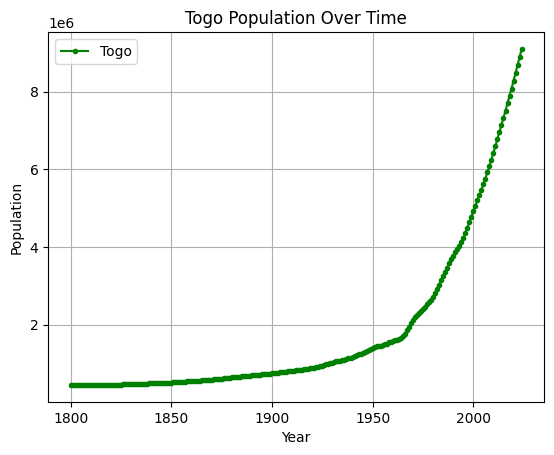

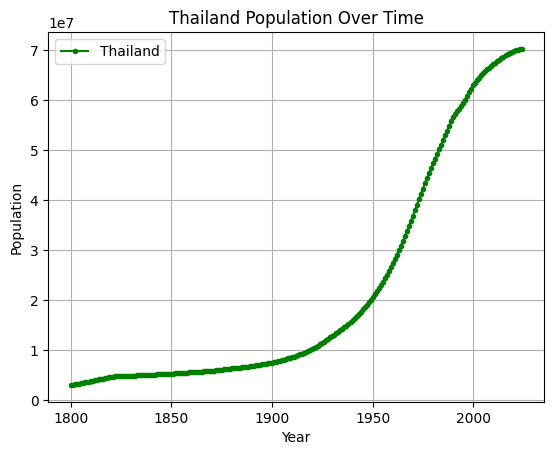

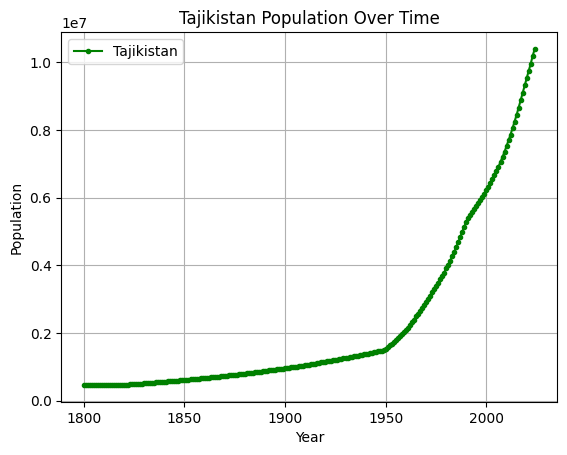

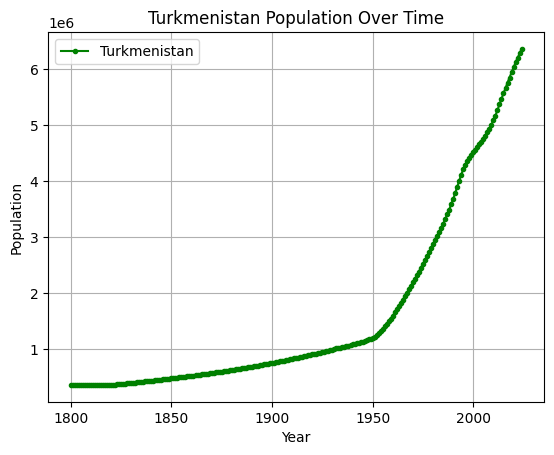

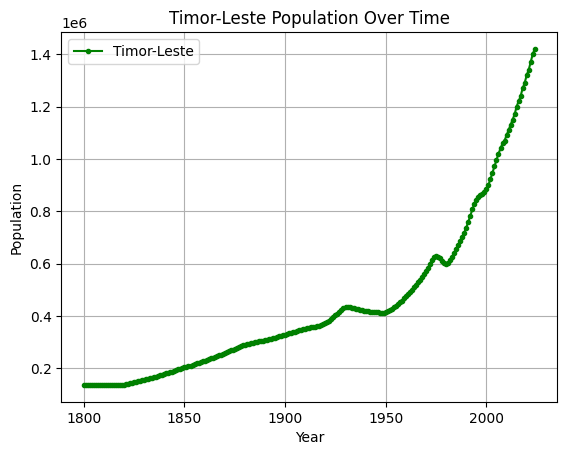

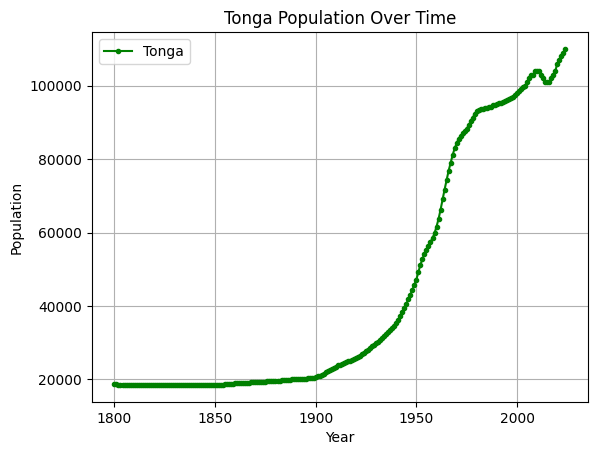

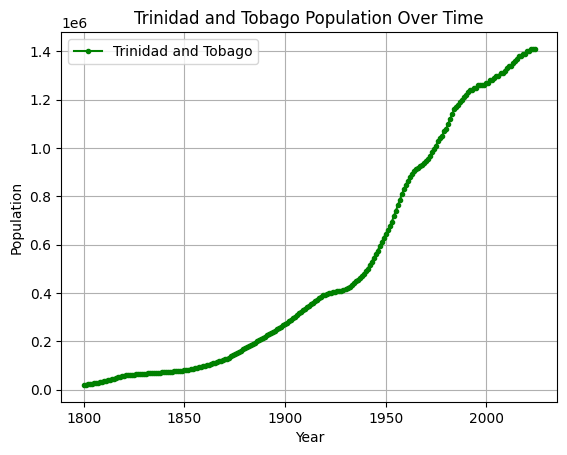

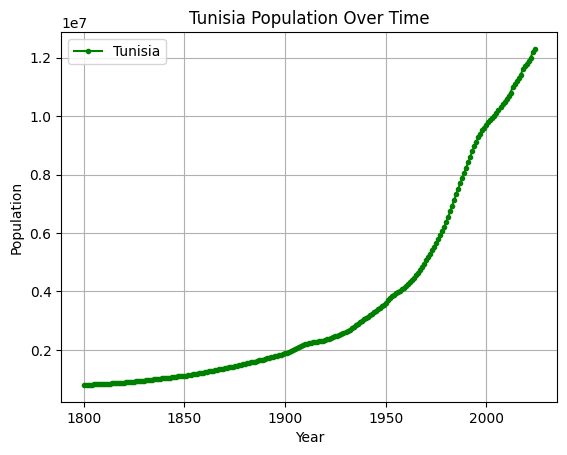

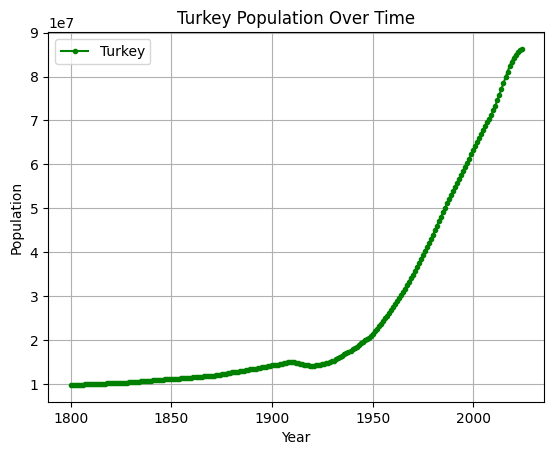

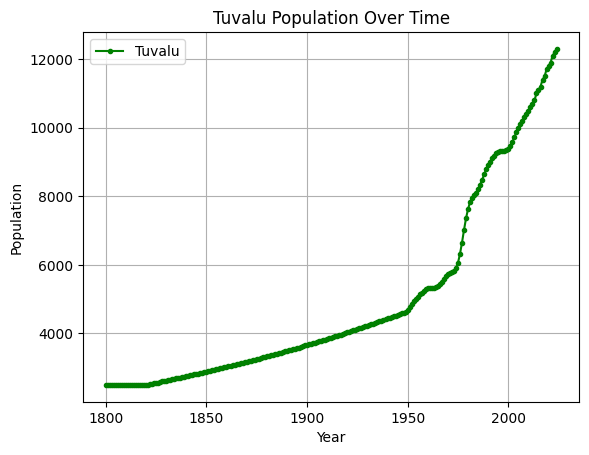

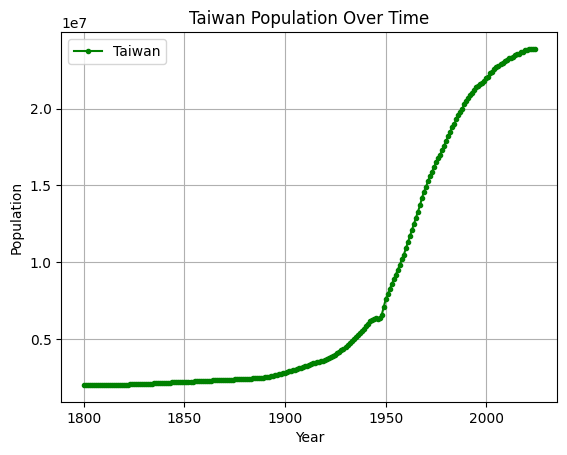

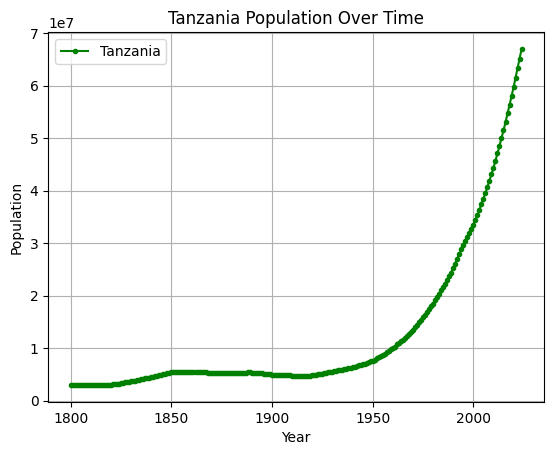

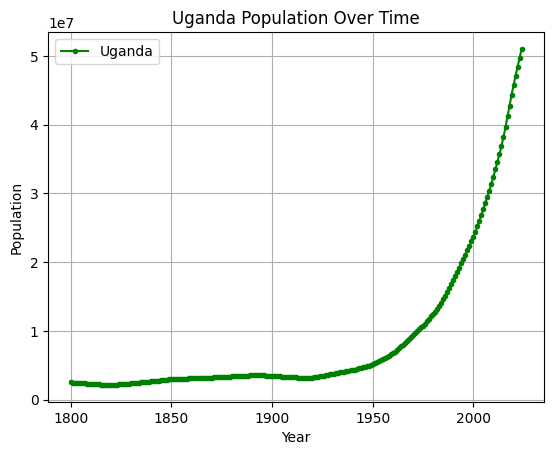

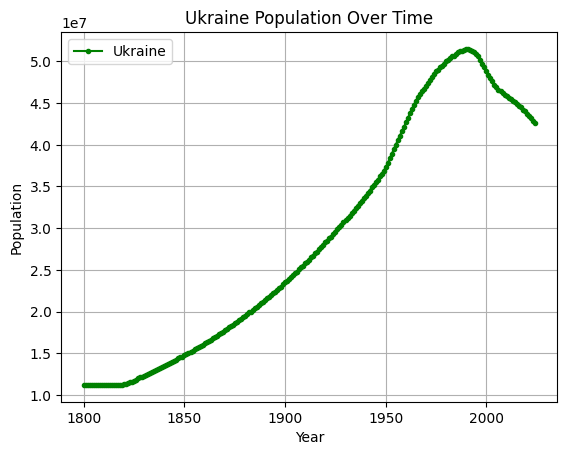

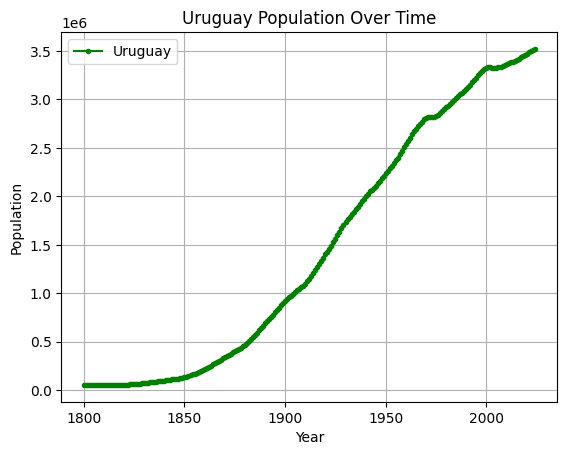

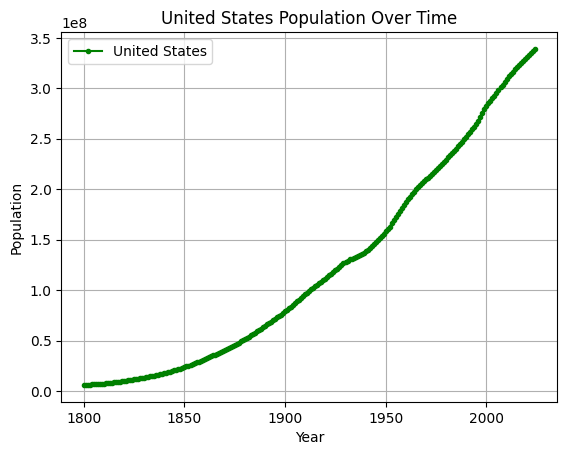

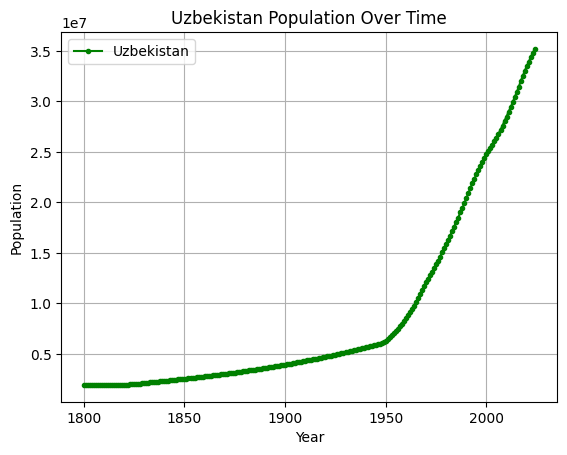

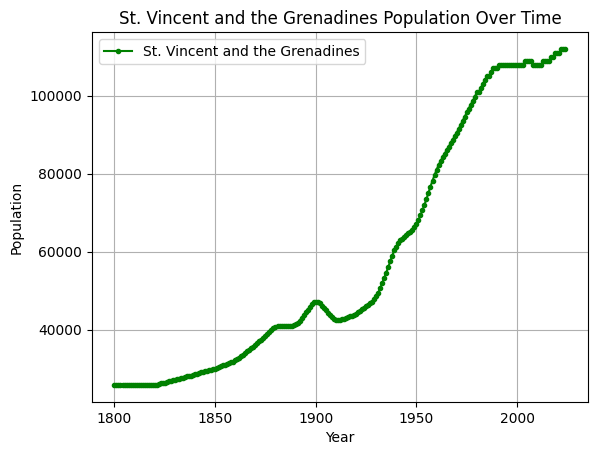

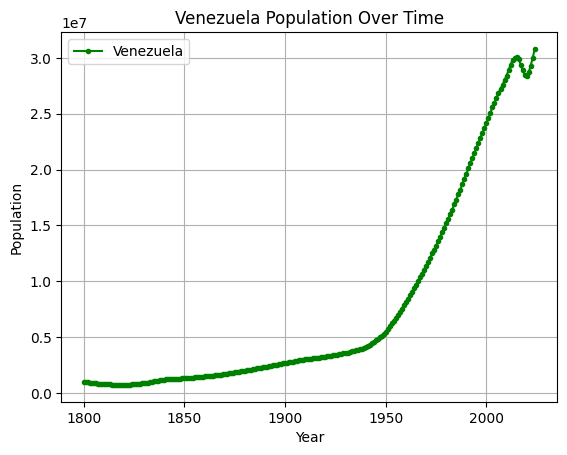

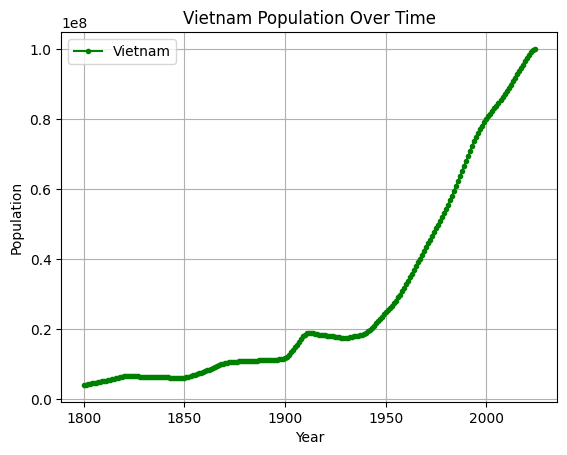

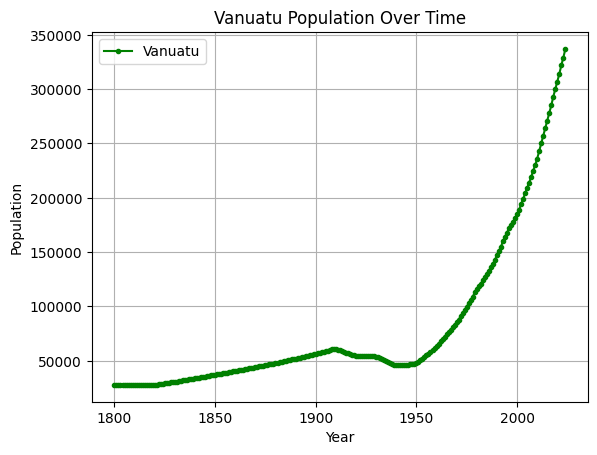

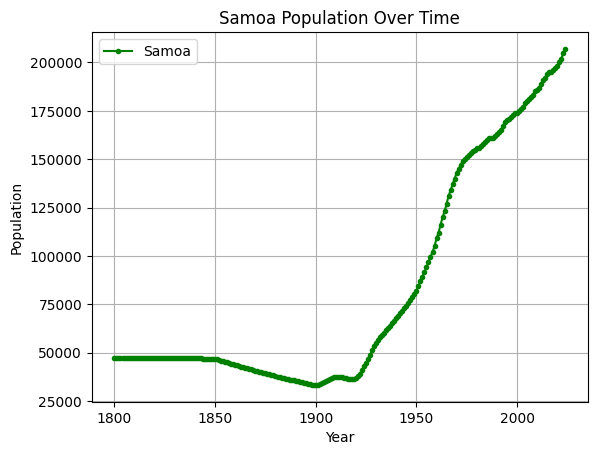

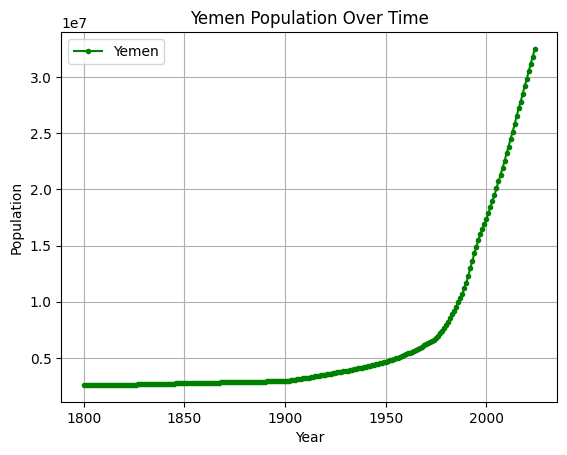

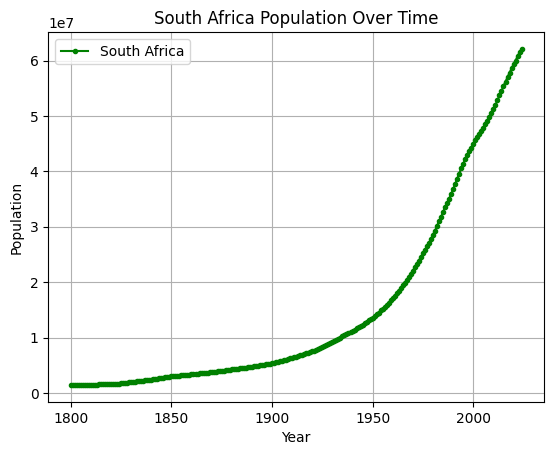

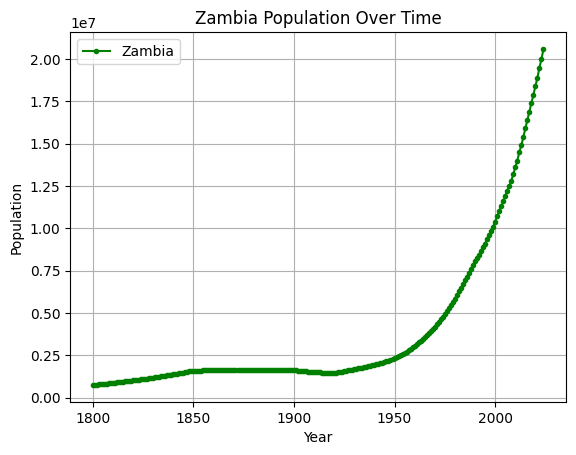

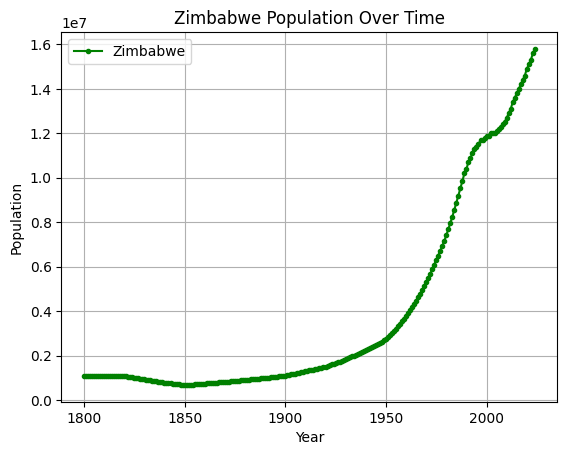

In [55]:
for col in  data_transposed.columns:
  plt.plot(data_transposed[col], 'g.-', label=col)
  plt.xlabel('Year')
  plt.ylabel('Population')
  plt.title(f'{col} Population Over Time')
  plt.legend()
  plt.grid()
  plt.figure(figsize=(10,6))
  plt.show()

- Many countries tends to have an incremental population.
- Another countries tends to have decreased population like:<br>
   - `Albania, Andorra, Armenia, Bulgaria, Bosnia and Herzegovina, Belarus, Estonia, Georgia, Greece, Romania, Serbia` (After 2000) due to: Mass Migration, After the collapse of the Soviet Union and the end of the Yugoslav wars.
   - `South Sudan, Syria`(After 2000) due to: Ongoing civil wars
   -  `Ukraine` (After 2000):due to :The conflict with Russia.
   - `Antigua and Barbuda, Barbados, Bhutan, Czech Republic, Latvia` (1900-1950):<br> due to : External Migration and World War II
   - `Marshall Islands` (1946-1958): due to U.S. nuclear testing
   






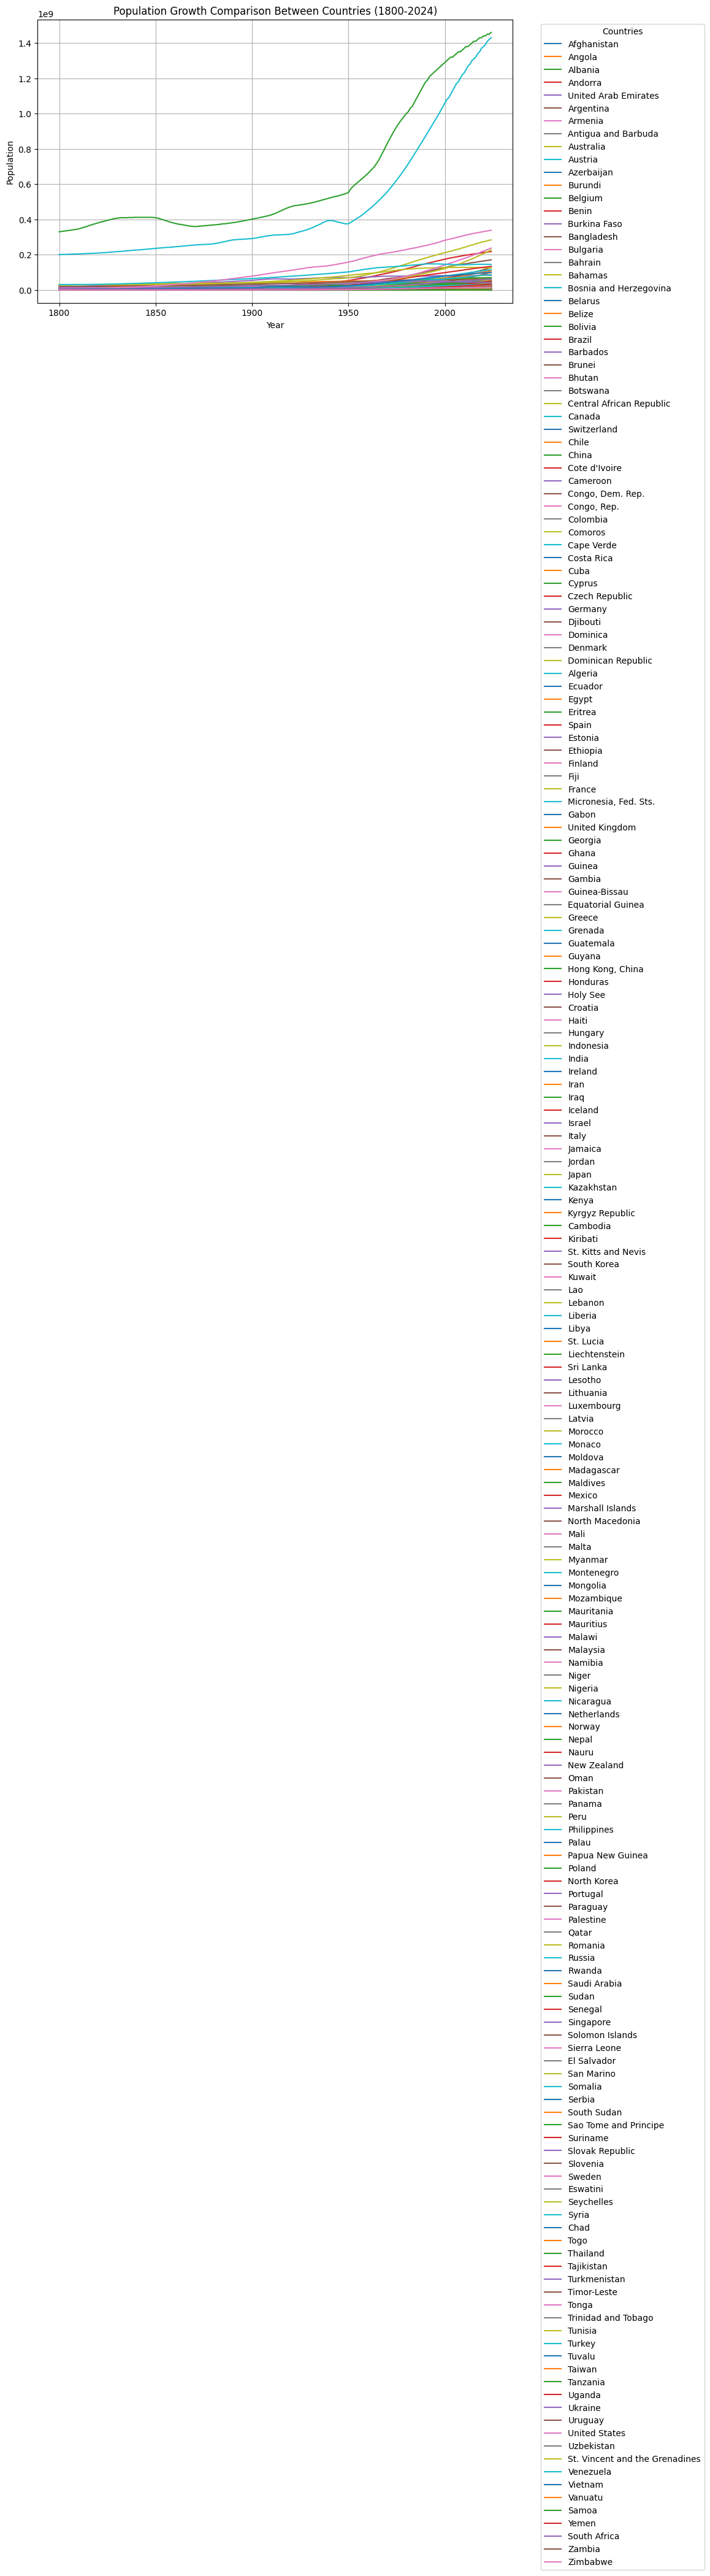

In [56]:
plt.figure(figsize=(10, 6))
for country in data_transposed.columns:
    plt.plot(data_transposed.index, data_transposed[country], label=country)

plt.title('Population Growth Comparison Between Countries (1800-2024)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Countries', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

 - The first two countries in population is `China` then `India` over the years.

---

 ### Continent :
  - Does population differ over Continents?
  - Which is the most Continent to have population over years.

In [57]:
country_to_continent = {
    'Afghanistan': 'Asia', 'Angola': 'Africa', 'Albania': 'Europe', 'Andorra': 'Europe',
    'United Arab Emirates': 'Asia', 'Argentina': 'South America', 'Armenia': 'Asia',
    'Antigua and Barbuda': 'North America', 'Australia': 'Oceania', 'Austria': 'Europe',
    'Azerbaijan': 'Asia', 'Burundi': 'Africa', 'Belgium': 'Europe', 'Benin': 'Africa',
    'Burkina Faso': 'Africa', 'Bangladesh': 'Asia', 'Bulgaria': 'Europe', 'Bahrain': 'Asia',
    'Bahamas': 'North America', 'Bosnia and Herzegovina': 'Europe', 'Belarus': 'Europe',
    'Belize': 'North America', 'Bolivia': 'South America', 'Brazil': 'South America',
    'Barbados': 'North America', 'Brunei': 'Asia', 'Bhutan': 'Asia', 'Botswana': 'Africa',
    'Central African Republic': 'Africa', 'Canada': 'North America', 'Switzerland': 'Europe',
    'Chile': 'South America', 'China': 'Asia', 'Cote d\'Ivoire': 'Africa', 'Cameroon': 'Africa',
    'Congo, Dem. Rep.': 'Africa', 'Congo, Rep.': 'Africa', 'Colombia': 'South America',
    'Comoros': 'Africa', 'Cape Verde': 'Africa', 'Costa Rica': 'North America', 'Cuba': 'North America',
    'Cyprus': 'Asia', 'Czech Republic': 'Europe', 'Germany': 'Europe', 'Djibouti': 'Africa',
    'Dominica': 'North America', 'Denmark': 'Europe', 'Dominican Republic': 'North America',
    'Algeria': 'Africa', 'Ecuador': 'South America', 'Egypt': 'Africa', 'Eritrea': 'Africa',
    'Spain': 'Europe', 'Estonia': 'Europe', 'Ethiopia': 'Africa', 'Finland': 'Europe',
    'Fiji': 'Oceania', 'France': 'Europe', 'Micronesia, Fed. Sts.': 'Oceania', 'Gabon': 'Africa',
    'United Kingdom': 'Europe', 'Georgia': 'Asia', 'Ghana': 'Africa', 'Guinea': 'Africa',
    'Gambia': 'Africa', 'Guinea-Bissau': 'Africa', 'Equatorial Guinea': 'Africa', 'Greece': 'Europe',
    'Grenada': 'North America', 'Guatemala': 'North America', 'Guyana': 'South America',
    'Hong Kong, China': 'Asia', 'Honduras': 'North America', 'Holy See': 'Europe', 'Croatia': 'Europe',
    'Haiti': 'North America', 'Hungary': 'Europe', 'Indonesia': 'Asia', 'India': 'Asia',
    'Ireland': 'Europe', 'Iran': 'Asia', 'Iraq': 'Asia', 'Iceland': 'Europe', 'Israel': 'Asia',
    'Italy': 'Europe', 'Jamaica': 'North America', 'Jordan': 'Asia', 'Japan': 'Asia',
    'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kyrgyz Republic': 'Asia', 'Cambodia': 'Asia',
    'Kiribati': 'Oceania', 'St. Kitts and Nevis': 'North America', 'South Korea': 'Asia',
    'Kuwait': 'Asia', 'Lao': 'Asia', 'Lebanon': 'Asia', 'Liberia': 'Africa', 'Libya': 'Africa',
    'St. Lucia': 'North America', 'Liechtenstein': 'Europe', 'Sri Lanka': 'Asia', 'Lesotho': 'Africa',
    'Lithuania': 'Europe', 'Luxembourg': 'Europe', 'Latvia': 'Europe', 'Morocco': 'Africa',
    'Monaco': 'Europe', 'Moldova': 'Europe', 'Madagascar': 'Africa', 'Maldives': 'Asia',
    'Mexico': 'North America', 'Marshall Islands': 'Oceania', 'North Macedonia': 'Europe',
    'Mali': 'Africa', 'Malta': 'Europe', 'Myanmar': 'Asia', 'Montenegro': 'Europe', 'Mongolia': 'Asia',
    'Mozambique': 'Africa', 'Mauritania': 'Africa', 'Mauritius': 'Africa', 'Malawi': 'Africa',
    'Malaysia': 'Asia', 'Namibia': 'Africa', 'Niger': 'Africa', 'Nigeria': 'Africa', 'Nicaragua': 'North America',
    'Netherlands': 'Europe', 'Norway': 'Europe', 'Nepal': 'Asia', 'Nauru': 'Oceania', 'New Zealand': 'Oceania',
    'Oman': 'Asia', 'Pakistan': 'Asia', 'Panama': 'North America', 'Peru': 'South America', 'Philippines': 'Asia',
    'Palau': 'Oceania', 'Papua New Guinea': 'Oceania', 'Poland': 'Europe', 'North Korea': 'Asia',
    'Portugal': 'Europe', 'Paraguay': 'South America', 'Palestine': 'Asia', 'Qatar': 'Asia',
    'Romania': 'Europe', 'Russia': 'Europe', 'Rwanda': 'Africa', 'Saudi Arabia': 'Asia', 'Sudan': 'Africa',
    'Senegal': 'Africa', 'Singapore': 'Asia', 'Solomon Islands': 'Oceania', 'Sierra Leone': 'Africa',
    'El Salvador': 'North America', 'San Marino': 'Europe', 'Somalia': 'Africa', 'Serbia': 'Europe',
    'South Sudan': 'Africa', 'Sao Tome and Principe': 'Africa', 'Suriname': 'South America',
    'Slovak Republic': 'Europe', 'Slovenia': 'Europe', 'Sweden': 'Europe', 'Eswatini': 'Africa',
    'Seychelles': 'Africa', 'Syria': 'Asia', 'Chad': 'Africa', 'Togo': 'Africa', 'Thailand': 'Asia',
    'Tajikistan': 'Asia', 'Turkmenistan': 'Asia', 'Timor-Leste': 'Asia', 'Tonga': 'Oceania', 'Trinidad and Tobago': 'North America',
    'Tunisia': 'Africa', 'Turkey': 'Asia', 'Tuvalu': 'Oceania', 'Taiwan': 'Asia', 'Tanzania': 'Africa',
    'Uganda': 'Africa', 'Ukraine': 'Europe', 'Uruguay': 'South America', 'United States': 'North America',
    'Uzbekistan': 'Asia', 'St. Vincent and the Grenadines': 'North America', 'Venezuela': 'South America',
    'Vietnam': 'Asia', 'Vanuatu': 'Oceania', 'Samoa': 'Oceania', 'Yemen': 'Asia', 'South Africa': 'Africa',
    'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}


data['continent'] = data.index.map(country_to_continent)


data.head().style.background_gradient(cmap='Greens')

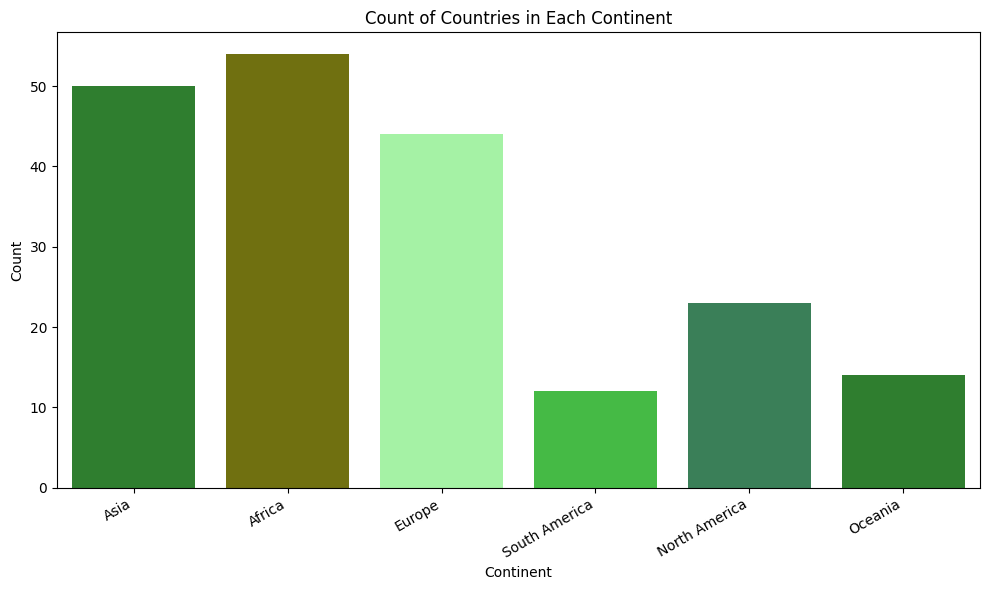

In [58]:
colors = ['#228B22', '#808000', '#98FF98', '#32CD32', '#2E8B57']

plt.figure(figsize=(10, 6))

sns.countplot(data=data, x='continent', hue='continent', palette=colors)
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Count of Countries in Each Continent')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

- The most of data counties in `Africa` then `Asia`.

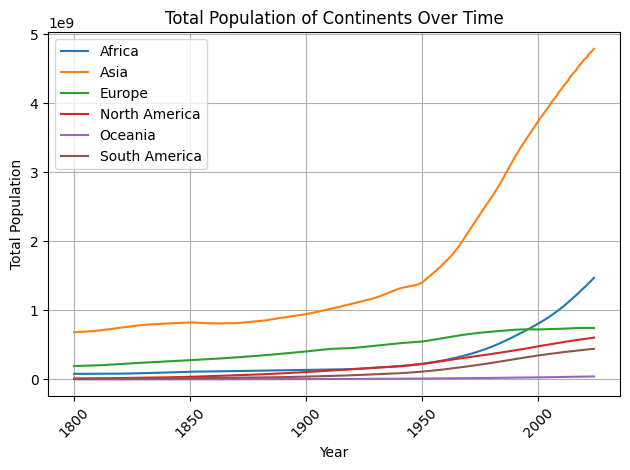

In [59]:
continent_pop = data.groupby('continent').sum()

continent_pop_transposed = continent_pop.T

for continent in continent_pop_transposed.columns:
    plt.plot(continent_pop_transposed.index, continent_pop_transposed[continent], label=continent)

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population of Continents Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()


- `Asia` has the most population over years, Then `Europe`.
<br>although `Africa` and The Americas come first in size.<br>
and `Africa` has the most countries in data.

- It may be due to many reasons :<br>
Living conditions and availability of services.

---

 ### Global world :
  - Does population increase or decrease over years?


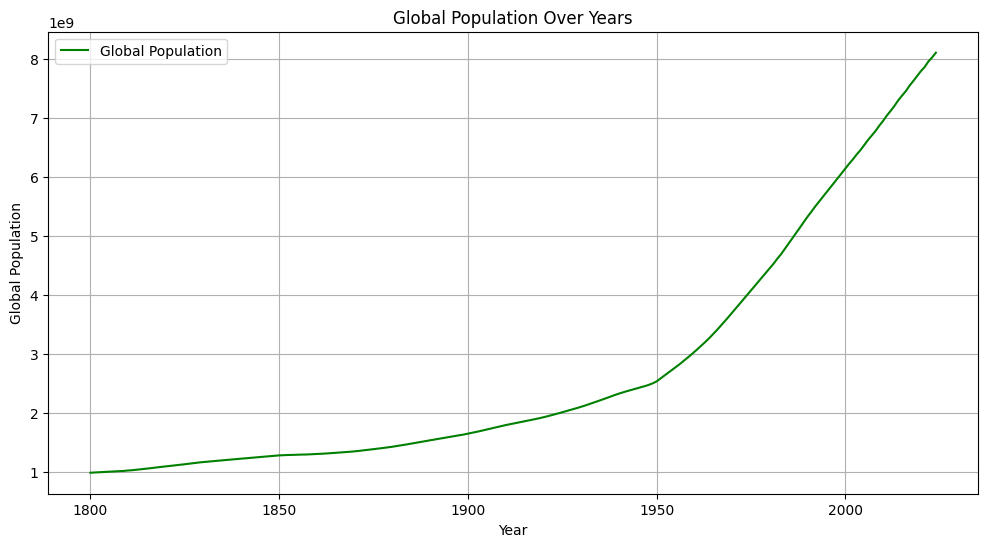

In [60]:
df_without_continent = data.drop(columns='continent')

global_population = df_without_continent.sum()


plt.figure(figsize=(12, 6))

plt.plot(global_population.index, global_population.values, label='Global Population', color='green')

plt.xlabel('Year')
plt.ylabel('Global Population')
plt.title('Global Population Over Years')
plt.legend()

plt.grid(True)
plt.show()

- The general population increased over time .

---

# <p style="padding:5px;background-color:#338565;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 15px;overflow:hidden;font-weight:500"> Conclusion 🎗️</p>

- countries :                        
    - The population decline in these regions was the result of a combination of factors, including wars, mass migration, natural or man-made disasters, economic and social changes, and shifting lifestyle.
    - The most country to have population is `China` then `Indai`.

- Continents:                                                 
     - Asia` has the most population over years, Then `Europe`.
     - It may be due to many reasons :<br>
         Living conditions and availability of services.

- Over the world :                           
     - The general population increased over time.